In [2]:
import os # For operating system dependent functionality
import cv2 # OpenCV array structures are converted to and from Numpy arrays - For reading Images
import glob # Find all the pathnames matching a specified pattern
import numpy as np # A powerful N-dimensional array object
import pandas as pd # Data frame manipulation
from matplotlib import pyplot as plt # Plotting graphs
import seaborn as sns # Plotting graphs
from keras.utils import np_utils # Modelling
from sklearn.metrics import accuracy_score, classification_report # Modelling
from PIL import Image 

C:\Users\HARSHIT\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
from keras.models import Sequential 
from keras.layers import Convolution2D 
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers.core import Activation, Dropout

In [5]:
import scipy.io
mat = scipy.io.loadmat('E:/Text recog/train/digitStruct.mat')

NotImplementedError: Please use HDF reader for matlab v7.3 files

In [6]:
import h5py 
f= h5py.File('E:/Text recog/train/digitStruct.mat','r')

In [7]:
items = f.items()
keys = f.keys()

In [88]:
list(f.keys())
list(f['digitStruct'].keys())
f['digitStruct'].attrs['name']

KeyError: "Can't open attribute (can't locate attribute: 'name')"

In [121]:
data = f['digitStruct']
names = list(data['name'])
print(data.name)
#print(names.name)
print(type(data))
print(type(names))
names[0]

#Checkout what keys are inside that group.
for key in data.keys():
    print(key)

names = data['name']
names[0][0]
v = data[names[0][0]].value
for asc in v:
    print(chr(asc))
#print(names[0])
#Do whatever you want with data

#After you are done
#data.close()

/digitStruct
<class 'h5py._hl.group.Group'>
<class 'list'>
bbox
name
1
.
p
n
g


In [8]:
def get_box_data(index, f):
    """
    get `left, top, width, height` of each picture
    :param index:
    :param hdf5_data:
    :return:
    """
    meta_data = dict()
    meta_data['height'] = []
    meta_data['label'] = []
    meta_data['left'] = []
    meta_data['top'] = []
    meta_data['width'] = []

    def print_attrs(name, obj):
        vals = []
        if obj.shape[0] == 1:
            vals.append(int(obj[0][0]))
        else:
            for k in range(obj.shape[0]):
                vals.append(int(f[obj[k][0]][0][0]))
        meta_data[name] = vals

    box = f['/digitStruct/bbox'][index]
    f[box[0]].visititems(print_attrs)
    return meta_data

def get_name(index, f):
    name = f['/digitStruct/name']
    return ''.join([chr(v[0]) for v in f[name[index][0]].value])

In [9]:
folder = 'E:/Text recog/train'
import tqdm

In [10]:
mat_data = h5py.File(os.path.join(folder, 'digitStruct.mat'))
size = mat_data['/digitStruct/name'].size

for _i in tqdm.tqdm(range(size)):
    pic = get_name(_i, mat_data)
    box = get_box_data(_i, mat_data)

100%|██████████| 33402/33402 [05:04<00:00, 109.86it/s]


In [11]:
print(get_name(156,f))
get_box_data(156,f)

157.png


{'height': [37, 37],
 'label': [5, 7],
 'left': [37, 65],
 'top': [7, 7],
 'width': [26, 23]}

In [321]:
print(get_name(3099,f))
print(get_box_data(3099,f))

3100.png
{'height': [38, 38, 38], 'label': [1, 2, 6], 'left': [-1, 4, 22], 'top': [12, 12, 13], 'width': [3, 18, 17]}


In [12]:
#IMporting training dataset 

PATH = r'E:/Text recog/train/*.png'
files = glob.glob(PATH)
X_train = [ None for i in range(len(files))]
print(len(files))
for fl in tqdm.tqdm(files):
    flbase = os.path.basename(fl)
    idx = int(flbase[:-4])-1
    img = cv2.imread(fl, 0)
    #X_train.append(img)
    #X_name.append(flbase)
    X_train[idx] = img

33402


100%|██████████| 33402/33402 [04:52<00:00, 114.32it/s]


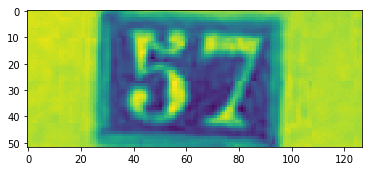

In [13]:
plt.imshow(X_train[156])




  0%|          | 0/8350 [00:00<?, ?it/s]


  0%|          | 1/8350 [00:00<14:50,  9.37it/s]


  0%|          | 2/8350 [00:00<16:10,  8.60it/s]


  0%|          | 3/8350 [00:00<18:21,  7.58it/s]


  0%|          | 4/8350 [00:00<17:38,  7.89it/s]


  0%|          | 5/8350 [00:00<16:37,  8.36it/s]


  0%|          | 6/8350 [00:00<16:00,  8.69it/s]


  0%|          | 8/8350 [00:00<15:31,  8.95it/s]


  0%|          | 9/8350 [00:01<16:29,  8.43it/s]


  0%|          | 10/8350 [00:01<17:14,  8.06it/s]


  0%|          | 11/8350 [00:01<18:28,  7.53it/s]


  0%|          | 12/8350 [00:01<17:09,  8.10it/s]


  0%|          | 13/8350 [00:01<16:12,  8.57it/s]


  0%|          | 14/8350 [00:01<15:32,  8.94it/s]


  0%|          | 16/8350 [00:01<13:27, 10.32it/s]


  0%|          | 18/8350 [00:02<14:29,  9.59it/s]


  0%|          | 20/8350 [00:02<16:34,  8.38it/s]


  0%|          | 22/8350 [00:02<14:46,  9.39it/s]


  0%|          | 24/8350 [00:02<13:21, 10.39it/s]


  0%|          | 26/8350 [

  4%|▎         | 296/8350 [00:26<08:38, 15.55it/s]


  4%|▎         | 298/8350 [00:26<09:19, 14.40it/s]


  4%|▎         | 302/8350 [00:27<07:55, 16.93it/s]


  4%|▎         | 304/8350 [00:27<07:43, 17.34it/s]


  4%|▎         | 306/8350 [00:27<08:29, 15.77it/s]


  4%|▎         | 308/8350 [00:27<09:20, 14.36it/s]


  4%|▎         | 310/8350 [00:27<09:44, 13.76it/s]


  4%|▎         | 312/8350 [00:27<09:07, 14.68it/s]


  4%|▍         | 314/8350 [00:27<08:42, 15.38it/s]


  4%|▍         | 316/8350 [00:28<09:19, 14.37it/s]


  4%|▍         | 318/8350 [00:28<09:39, 13.85it/s]


  4%|▍         | 320/8350 [00:28<09:31, 14.05it/s]


  4%|▍         | 322/8350 [00:28<10:05, 13.26it/s]


  4%|▍         | 324/8350 [00:28<10:07, 13.21it/s]


  4%|▍         | 326/8350 [00:28<10:14, 13.05it/s]


  4%|▍         | 328/8350 [00:28<10:16, 13.02it/s]


  4%|▍         | 330/8350 [00:29<10:12, 13.09it/s]


  4%|▍         | 333/8350 [00:29<09:18, 14.36it/s]


  4%|▍         | 335/8350 [00:29<10:47, 12.38i

  8%|▊         | 659/8350 [00:50<09:20, 13.72it/s]


  8%|▊         | 661/8350 [00:51<09:26, 13.56it/s]


  8%|▊         | 663/8350 [00:51<09:32, 13.42it/s]


  8%|▊         | 665/8350 [00:51<10:27, 12.25it/s]


  8%|▊         | 667/8350 [00:51<09:20, 13.70it/s]


  8%|▊         | 669/8350 [00:51<09:39, 13.25it/s]


  8%|▊         | 671/8350 [00:51<10:30, 12.17it/s]


  8%|▊         | 673/8350 [00:51<09:26, 13.55it/s]


  8%|▊         | 675/8350 [00:52<08:41, 14.71it/s]


  8%|▊         | 677/8350 [00:52<09:02, 14.15it/s]


  8%|▊         | 679/8350 [00:52<09:20, 13.68it/s]


  8%|▊         | 681/8350 [00:52<08:42, 14.69it/s]


  8%|▊         | 684/8350 [00:52<07:39, 16.69it/s]


  8%|▊         | 686/8350 [00:52<08:22, 15.25it/s]


  8%|▊         | 688/8350 [00:52<07:57, 16.04it/s]


  8%|▊         | 690/8350 [00:53<09:21, 13.65it/s]


  8%|▊         | 692/8350 [00:53<08:36, 14.83it/s]


  8%|▊         | 694/8350 [00:53<08:05, 15.78it/s]


  8%|▊         | 696/8350 [00:53<07:47, 16.36i

 12%|█▏        | 1004/8350 [01:13<08:13, 14.88it/s]


 12%|█▏        | 1006/8350 [01:13<07:47, 15.71it/s]


 12%|█▏        | 1008/8350 [01:13<08:19, 14.70it/s]


 12%|█▏        | 1010/8350 [01:13<08:40, 14.09it/s]


 12%|█▏        | 1012/8350 [01:13<08:51, 13.81it/s]


 12%|█▏        | 1014/8350 [01:14<10:51, 11.26it/s]


 12%|█▏        | 1016/8350 [01:14<09:34, 12.76it/s]


 12%|█▏        | 1019/8350 [01:14<08:08, 15.01it/s]


 12%|█▏        | 1021/8350 [01:14<07:47, 15.67it/s]


 12%|█▏        | 1023/8350 [01:14<08:53, 13.73it/s]


 12%|█▏        | 1026/8350 [01:14<07:46, 15.69it/s]


 12%|█▏        | 1028/8350 [01:15<08:12, 14.88it/s]


 12%|█▏        | 1030/8350 [01:15<09:19, 13.09it/s]


 12%|█▏        | 1032/8350 [01:15<10:08, 12.03it/s]


 12%|█▏        | 1035/8350 [01:15<09:03, 13.46it/s]


 12%|█▏        | 1037/8350 [01:15<08:24, 14.51it/s]


 12%|█▏        | 1039/8350 [01:15<08:38, 14.09it/s]


 12%|█▏        | 1041/8350 [01:16<09:55, 12.28it/s]


 12%|█▏        | 1043/8350 [

 16%|█▌        | 1329/8350 [01:37<09:50, 11.90it/s]


 16%|█▌        | 1331/8350 [01:37<10:35, 11.04it/s]


 16%|█▌        | 1333/8350 [01:38<09:18, 12.57it/s]


 16%|█▌        | 1336/8350 [01:38<07:53, 14.83it/s]


 16%|█▌        | 1338/8350 [01:38<08:59, 12.99it/s]


 16%|█▌        | 1340/8350 [01:38<08:20, 14.01it/s]


 16%|█▌        | 1342/8350 [01:38<10:28, 11.16it/s]


 16%|█▌        | 1345/8350 [01:38<08:47, 13.28it/s]


 16%|█▌        | 1347/8350 [01:39<08:02, 14.52it/s]


 16%|█▌        | 1349/8350 [01:39<08:14, 14.16it/s]


 16%|█▌        | 1351/8350 [01:39<09:10, 12.72it/s]


 16%|█▌        | 1354/8350 [01:39<07:48, 14.92it/s]


 16%|█▌        | 1356/8350 [01:39<07:23, 15.78it/s]


 16%|█▋        | 1358/8350 [01:39<08:03, 14.45it/s]


 16%|█▋        | 1360/8350 [01:39<09:25, 12.36it/s]


 16%|█▋        | 1362/8350 [01:40<10:13, 11.39it/s]


 16%|█▋        | 1364/8350 [01:40<09:02, 12.88it/s]


 16%|█▋        | 1368/8350 [01:40<07:26, 15.65it/s]


 16%|█▋        | 1370/8350 [

 20%|█▉        | 1663/8350 [02:01<09:17, 11.99it/s]


 20%|█▉        | 1665/8350 [02:01<09:04, 12.28it/s]


 20%|█▉        | 1667/8350 [02:01<08:09, 13.67it/s]


 20%|█▉        | 1669/8350 [02:01<07:36, 14.65it/s]


 20%|██        | 1671/8350 [02:01<07:51, 14.18it/s]


 20%|██        | 1673/8350 [02:02<08:01, 13.87it/s]


 20%|██        | 1675/8350 [02:02<07:25, 14.97it/s]


 20%|██        | 1677/8350 [02:02<07:02, 15.78it/s]


 20%|██        | 1679/8350 [02:02<07:56, 14.00it/s]


 20%|██        | 1681/8350 [02:02<07:23, 15.05it/s]


 20%|██        | 1683/8350 [02:02<07:01, 15.80it/s]


 20%|██        | 1685/8350 [02:02<06:47, 16.34it/s]


 20%|██        | 1687/8350 [02:02<06:42, 16.57it/s]


 20%|██        | 1689/8350 [02:03<06:25, 17.26it/s]


 20%|██        | 1691/8350 [02:03<06:18, 17.58it/s]


 20%|██        | 1693/8350 [02:03<06:14, 17.77it/s]


 20%|██        | 1695/8350 [02:03<06:09, 18.00it/s]


 20%|██        | 1697/8350 [02:03<06:07, 18.12it/s]


 20%|██        | 1700/8350 [

 24%|██▍       | 1996/8350 [02:24<09:20, 11.33it/s]


 24%|██▍       | 1998/8350 [02:24<10:03, 10.53it/s]


 24%|██▍       | 2000/8350 [02:24<11:12,  9.45it/s]


 24%|██▍       | 2002/8350 [02:24<09:44, 10.86it/s]


 24%|██▍       | 2005/8350 [02:25<08:03, 13.12it/s]


 24%|██▍       | 2007/8350 [02:25<07:19, 14.42it/s]


 24%|██▍       | 2009/8350 [02:25<08:31, 12.39it/s]


 24%|██▍       | 2011/8350 [02:25<08:22, 12.62it/s]


 24%|██▍       | 2013/8350 [02:25<07:40, 13.76it/s]


 24%|██▍       | 2015/8350 [02:25<07:17, 14.47it/s]


 24%|██▍       | 2017/8350 [02:25<06:49, 15.46it/s]


 24%|██▍       | 2019/8350 [02:25<07:11, 14.67it/s]


 24%|██▍       | 2021/8350 [02:26<06:59, 15.09it/s]


 24%|██▍       | 2023/8350 [02:26<07:38, 13.81it/s]


 24%|██▍       | 2025/8350 [02:26<07:44, 13.62it/s]


 24%|██▍       | 2027/8350 [02:26<07:49, 13.46it/s]


 24%|██▍       | 2029/8350 [02:26<07:51, 13.40it/s]


 24%|██▍       | 2031/8350 [02:26<08:49, 11.94it/s]


 24%|██▍       | 2033/8350 [

 28%|██▊       | 2331/8350 [02:47<07:08, 14.03it/s]


 28%|██▊       | 2333/8350 [02:47<08:01, 12.48it/s]


 28%|██▊       | 2335/8350 [02:47<07:18, 13.70it/s]


 28%|██▊       | 2337/8350 [02:47<07:26, 13.46it/s]


 28%|██▊       | 2339/8350 [02:47<06:49, 14.67it/s]


 28%|██▊       | 2341/8350 [02:47<06:30, 15.37it/s]


 28%|██▊       | 2343/8350 [02:47<07:12, 13.89it/s]


 28%|██▊       | 2346/8350 [02:48<06:40, 14.98it/s]


 28%|██▊       | 2348/8350 [02:48<06:30, 15.39it/s]


 28%|██▊       | 2350/8350 [02:48<06:52, 14.53it/s]


 28%|██▊       | 2352/8350 [02:48<06:27, 15.47it/s]


 28%|██▊       | 2354/8350 [02:48<06:17, 15.90it/s]


 28%|██▊       | 2357/8350 [02:48<05:40, 17.58it/s]


 28%|██▊       | 2359/8350 [02:48<06:55, 14.43it/s]


 28%|██▊       | 2362/8350 [02:49<06:01, 16.56it/s]


 28%|██▊       | 2364/8350 [02:49<05:49, 17.11it/s]


 28%|██▊       | 2366/8350 [02:49<06:23, 15.60it/s]


 28%|██▊       | 2368/8350 [02:49<06:11, 16.11it/s]


 28%|██▊       | 2370/8350 [

 32%|███▏      | 2680/8350 [03:10<07:49, 12.08it/s]


 32%|███▏      | 2682/8350 [03:10<07:39, 12.32it/s]


 32%|███▏      | 2684/8350 [03:11<07:29, 12.60it/s]


 32%|███▏      | 2686/8350 [03:11<08:04, 11.70it/s]


 32%|███▏      | 2688/8350 [03:11<07:51, 12.00it/s]


 32%|███▏      | 2690/8350 [03:11<09:33,  9.88it/s]


 32%|███▏      | 2692/8350 [03:11<09:53,  9.54it/s]


 32%|███▏      | 2694/8350 [03:12<08:51, 10.63it/s]


 32%|███▏      | 2696/8350 [03:12<09:30,  9.92it/s]


 32%|███▏      | 2698/8350 [03:12<08:51, 10.63it/s]


 32%|███▏      | 2700/8350 [03:12<08:05, 11.64it/s]


 32%|███▏      | 2702/8350 [03:12<07:48, 12.07it/s]


 32%|███▏      | 2704/8350 [03:12<08:26, 11.15it/s]


 32%|███▏      | 2706/8350 [03:13<07:26, 12.64it/s]


 32%|███▏      | 2708/8350 [03:13<06:48, 13.80it/s]


 32%|███▏      | 2710/8350 [03:13<07:37, 12.33it/s]


 32%|███▏      | 2712/8350 [03:13<07:29, 12.56it/s]


 33%|███▎      | 2714/8350 [03:13<07:35, 12.39it/s]


 33%|███▎      | 2716/8350 [

 36%|███▌      | 3010/8350 [03:33<05:16, 16.88it/s]


 36%|███▌      | 3012/8350 [03:33<07:11, 12.37it/s]


 36%|███▌      | 3015/8350 [03:33<06:05, 14.59it/s]


 36%|███▌      | 3019/8350 [03:34<05:07, 17.35it/s]


 36%|███▌      | 3022/8350 [03:34<06:07, 14.48it/s]


 36%|███▌      | 3024/8350 [03:34<07:42, 11.52it/s]


 36%|███▌      | 3026/8350 [03:34<07:26, 11.91it/s]


 36%|███▋      | 3028/8350 [03:34<07:13, 12.27it/s]


 36%|███▋      | 3031/8350 [03:34<06:05, 14.57it/s]


 36%|███▋      | 3033/8350 [03:35<05:42, 15.54it/s]


 36%|███▋      | 3035/8350 [03:35<05:25, 16.34it/s]


 36%|███▋      | 3038/8350 [03:35<04:49, 18.35it/s]


 36%|███▋      | 3041/8350 [03:35<04:25, 20.03it/s]


 36%|███▋      | 3044/8350 [03:35<04:30, 19.61it/s]


 36%|███▋      | 3047/8350 [03:35<05:54, 14.94it/s]


 37%|███▋      | 3050/8350 [03:36<05:34, 15.85it/s]


 37%|███▋      | 3052/8350 [03:36<05:25, 16.29it/s]


 37%|███▋      | 3054/8350 [03:36<05:49, 15.15it/s]


 37%|███▋      | 3056/8350 [

 40%|████      | 3373/8350 [03:56<05:24, 15.33it/s]


 40%|████      | 3376/8350 [03:57<05:09, 16.09it/s]


 40%|████      | 3378/8350 [03:57<05:30, 15.03it/s]


 40%|████      | 3380/8350 [03:57<06:17, 13.18it/s]


 41%|████      | 3382/8350 [03:57<05:43, 14.46it/s]


 41%|████      | 3384/8350 [03:57<05:25, 15.28it/s]


 41%|████      | 3386/8350 [03:57<05:09, 16.06it/s]


 41%|████      | 3388/8350 [03:57<04:59, 16.56it/s]


 41%|████      | 3392/8350 [03:58<04:17, 19.26it/s]


 41%|████      | 3395/8350 [03:58<04:38, 17.79it/s]


 41%|████      | 3397/8350 [03:58<05:07, 16.11it/s]


 41%|████      | 3399/8350 [03:58<04:55, 16.73it/s]


 41%|████      | 3401/8350 [03:58<05:30, 15.00it/s]


 41%|████      | 3403/8350 [03:58<06:21, 12.95it/s]


 41%|████      | 3405/8350 [03:58<05:47, 14.25it/s]


 41%|████      | 3407/8350 [03:59<05:54, 13.94it/s]


 41%|████      | 3410/8350 [03:59<05:06, 16.11it/s]


 41%|████      | 3412/8350 [03:59<05:27, 15.07it/s]


 41%|████      | 3414/8350 [

 45%|████▍     | 3724/8350 [04:20<05:43, 13.45it/s]


 45%|████▍     | 3726/8350 [04:20<05:20, 14.44it/s]


 45%|████▍     | 3728/8350 [04:20<04:58, 15.47it/s]


 45%|████▍     | 3730/8350 [04:20<05:12, 14.77it/s]


 45%|████▍     | 3732/8350 [04:20<05:00, 15.38it/s]


 45%|████▍     | 3734/8350 [04:20<05:38, 13.63it/s]


 45%|████▍     | 3736/8350 [04:21<07:32, 10.19it/s]


 45%|████▍     | 3738/8350 [04:21<06:31, 11.78it/s]


 45%|████▍     | 3740/8350 [04:21<06:58, 11.01it/s]


 45%|████▍     | 3742/8350 [04:21<06:08, 12.52it/s]


 45%|████▍     | 3744/8350 [04:21<06:38, 11.55it/s]


 45%|████▍     | 3748/8350 [04:21<05:26, 14.11it/s]


 45%|████▍     | 3751/8350 [04:22<05:05, 15.07it/s]


 45%|████▍     | 3753/8350 [04:22<04:49, 15.90it/s]


 45%|████▍     | 3755/8350 [04:22<05:06, 14.98it/s]


 45%|████▍     | 3757/8350 [04:22<05:19, 14.39it/s]


 45%|████▌     | 3759/8350 [04:22<05:29, 13.95it/s]


 45%|████▌     | 3761/8350 [04:22<05:06, 14.98it/s]


 45%|████▌     | 3763/8350 [

 49%|████▊     | 4065/8350 [04:44<06:09, 11.59it/s]


 49%|████▊     | 4067/8350 [04:44<05:45, 12.39it/s]


 49%|████▊     | 4069/8350 [04:44<05:15, 13.57it/s]


 49%|████▉     | 4071/8350 [04:44<06:47, 10.51it/s]


 49%|████▉     | 4073/8350 [04:45<07:27,  9.56it/s]


 49%|████▉     | 4075/8350 [04:45<06:57, 10.23it/s]


 49%|████▉     | 4077/8350 [04:45<06:02, 11.78it/s]


 49%|████▉     | 4079/8350 [04:45<06:03, 11.74it/s]


 49%|████▉     | 4081/8350 [04:45<06:51, 10.37it/s]


 49%|████▉     | 4083/8350 [04:46<06:47, 10.48it/s]


 49%|████▉     | 4085/8350 [04:46<06:53, 10.31it/s]


 49%|████▉     | 4087/8350 [04:46<06:06, 11.62it/s]


 49%|████▉     | 4089/8350 [04:46<05:50, 12.14it/s]


 49%|████▉     | 4091/8350 [04:46<06:32, 10.84it/s]


 49%|████▉     | 4093/8350 [04:46<06:45, 10.50it/s]


 49%|████▉     | 4095/8350 [04:47<06:11, 11.46it/s]


 49%|████▉     | 4097/8350 [04:47<05:48, 12.21it/s]


 49%|████▉     | 4099/8350 [04:47<05:37, 12.58it/s]


 49%|████▉     | 4101/8350 [

 53%|█████▎    | 4401/8350 [05:08<07:46,  8.47it/s]


 53%|█████▎    | 4403/8350 [05:08<06:58,  9.42it/s]


 53%|█████▎    | 4405/8350 [05:09<08:00,  8.22it/s]


 53%|█████▎    | 4406/8350 [05:09<08:34,  7.67it/s]


 53%|█████▎    | 4409/8350 [05:09<07:13,  9.10it/s]


 53%|█████▎    | 4412/8350 [05:09<05:53, 11.13it/s]


 53%|█████▎    | 4416/8350 [05:09<04:50, 13.54it/s]


 53%|█████▎    | 4418/8350 [05:10<05:33, 11.80it/s]


 53%|█████▎    | 4420/8350 [05:10<05:18, 12.34it/s]


 53%|█████▎    | 4423/8350 [05:10<04:46, 13.68it/s]


 53%|█████▎    | 4425/8350 [05:10<04:30, 14.50it/s]


 53%|█████▎    | 4428/8350 [05:10<04:01, 16.23it/s]


 53%|█████▎    | 4431/8350 [05:10<03:36, 18.08it/s]


 53%|█████▎    | 4434/8350 [05:11<03:48, 17.13it/s]


 53%|█████▎    | 4436/8350 [05:11<04:28, 14.59it/s]


 53%|█████▎    | 4438/8350 [05:11<04:40, 13.94it/s]


 53%|█████▎    | 4440/8350 [05:11<04:21, 14.93it/s]


 53%|█████▎    | 4442/8350 [05:11<05:07, 12.72it/s]


 53%|█████▎    | 4444/8350 [

 57%|█████▋    | 4737/8350 [05:33<04:18, 13.98it/s]


 57%|█████▋    | 4739/8350 [05:33<04:02, 14.87it/s]


 57%|█████▋    | 4741/8350 [05:33<04:14, 14.17it/s]


 57%|█████▋    | 4743/8350 [05:34<04:45, 12.63it/s]


 57%|█████▋    | 4745/8350 [05:34<04:21, 13.77it/s]


 57%|█████▋    | 4747/8350 [05:34<04:56, 12.16it/s]


 57%|█████▋    | 4749/8350 [05:34<04:30, 13.32it/s]


 57%|█████▋    | 4751/8350 [05:34<04:15, 14.06it/s]


 57%|█████▋    | 4753/8350 [05:34<03:58, 15.07it/s]


 57%|█████▋    | 4755/8350 [05:34<03:46, 15.89it/s]


 57%|█████▋    | 4757/8350 [05:35<03:36, 16.57it/s]


 57%|█████▋    | 4759/8350 [05:35<03:56, 15.21it/s]


 57%|█████▋    | 4761/8350 [05:35<03:44, 16.01it/s]


 57%|█████▋    | 4763/8350 [05:35<06:29,  9.22it/s]


 57%|█████▋    | 4765/8350 [05:36<07:19,  8.16it/s]


 57%|█████▋    | 4767/8350 [05:36<08:16,  7.22it/s]


 57%|█████▋    | 4768/8350 [05:36<09:34,  6.23it/s]


 57%|█████▋    | 4770/8350 [05:36<08:15,  7.22it/s]


 57%|█████▋    | 4771/8350 [

 61%|██████    | 5075/8350 [05:57<03:20, 16.36it/s]


 61%|██████    | 5077/8350 [05:57<03:56, 13.87it/s]


 61%|██████    | 5079/8350 [05:57<03:38, 14.97it/s]


 61%|██████    | 5081/8350 [05:57<03:48, 14.30it/s]


 61%|██████    | 5083/8350 [05:57<04:27, 12.19it/s]


 61%|██████    | 5086/8350 [05:57<03:45, 14.45it/s]


 61%|██████    | 5088/8350 [05:57<03:33, 15.30it/s]


 61%|██████    | 5090/8350 [05:58<03:21, 16.20it/s]


 61%|██████    | 5093/8350 [05:58<03:00, 18.09it/s]


 61%|██████    | 5095/8350 [05:58<02:59, 18.18it/s]


 61%|██████    | 5097/8350 [05:58<02:57, 18.29it/s]


 61%|██████    | 5099/8350 [05:58<02:55, 18.48it/s]


 61%|██████    | 5101/8350 [05:58<02:57, 18.30it/s]


 61%|██████    | 5103/8350 [05:58<03:03, 17.70it/s]


 61%|██████    | 5105/8350 [05:58<03:23, 15.94it/s]


 61%|██████    | 5107/8350 [05:58<03:18, 16.32it/s]


 61%|██████    | 5109/8350 [05:59<03:15, 16.60it/s]


 61%|██████    | 5113/8350 [05:59<02:47, 19.27it/s]


 61%|██████▏   | 5116/8350 [

 65%|██████▍   | 5406/8350 [06:18<03:37, 13.51it/s]


 65%|██████▍   | 5408/8350 [06:18<03:24, 14.39it/s]


 65%|██████▍   | 5410/8350 [06:18<03:31, 13.93it/s]


 65%|██████▍   | 5412/8350 [06:19<03:15, 15.02it/s]


 65%|██████▍   | 5414/8350 [06:19<04:10, 11.72it/s]


 65%|██████▍   | 5416/8350 [06:19<03:41, 13.23it/s]


 65%|██████▍   | 5418/8350 [06:19<03:26, 14.23it/s]


 65%|██████▍   | 5420/8350 [06:19<03:47, 12.88it/s]


 65%|██████▍   | 5422/8350 [06:19<03:45, 12.98it/s]


 65%|██████▍   | 5424/8350 [06:20<03:45, 12.96it/s]


 65%|██████▍   | 5426/8350 [06:20<04:04, 11.95it/s]


 65%|██████▌   | 5428/8350 [06:20<03:57, 12.30it/s]


 65%|██████▌   | 5430/8350 [06:20<04:15, 11.44it/s]


 65%|██████▌   | 5432/8350 [06:20<03:53, 12.49it/s]


 65%|██████▌   | 5434/8350 [06:20<03:32, 13.74it/s]


 65%|██████▌   | 5436/8350 [06:20<03:17, 14.74it/s]


 65%|██████▌   | 5441/8350 [06:21<03:00, 16.09it/s]


 65%|██████▌   | 5443/8350 [06:21<03:57, 12.25it/s]


 65%|██████▌   | 5445/8350 [

 69%|██████▉   | 5741/8350 [06:40<02:41, 16.12it/s]


 69%|██████▉   | 5743/8350 [06:41<02:40, 16.22it/s]


 69%|██████▉   | 5745/8350 [06:41<03:09, 13.74it/s]


 69%|██████▉   | 5747/8350 [06:41<03:53, 11.17it/s]


 69%|██████▉   | 5749/8350 [06:41<03:24, 12.71it/s]


 69%|██████▉   | 5751/8350 [06:41<03:23, 12.75it/s]


 69%|██████▉   | 5753/8350 [06:41<03:21, 12.91it/s]


 69%|██████▉   | 5755/8350 [06:42<03:20, 12.97it/s]


 69%|██████▉   | 5757/8350 [06:42<03:18, 13.03it/s]


 69%|██████▉   | 5759/8350 [06:42<03:19, 12.98it/s]


 69%|██████▉   | 5761/8350 [06:42<03:18, 13.02it/s]


 69%|██████▉   | 5763/8350 [06:42<03:43, 11.60it/s]


 69%|██████▉   | 5765/8350 [06:42<03:35, 11.99it/s]


 69%|██████▉   | 5767/8350 [06:43<03:40, 11.70it/s]


 69%|██████▉   | 5769/8350 [06:43<03:15, 13.19it/s]


 69%|██████▉   | 5771/8350 [06:43<03:56, 10.93it/s]


 69%|██████▉   | 5773/8350 [06:43<04:01, 10.69it/s]


 69%|██████▉   | 5775/8350 [06:43<04:06, 10.45it/s]


 69%|██████▉   | 5777/8350 [

 73%|███████▎  | 6083/8350 [07:04<02:48, 13.49it/s]


 73%|███████▎  | 6087/8350 [07:04<02:26, 15.45it/s]


 73%|███████▎  | 6089/8350 [07:04<02:20, 16.11it/s]


 73%|███████▎  | 6091/8350 [07:04<02:18, 16.33it/s]


 73%|███████▎  | 6093/8350 [07:04<02:16, 16.48it/s]


 73%|███████▎  | 6095/8350 [07:04<02:13, 16.88it/s]


 73%|███████▎  | 6097/8350 [07:04<02:13, 16.92it/s]


 73%|███████▎  | 6099/8350 [07:04<02:24, 15.56it/s]


 73%|███████▎  | 6102/8350 [07:05<02:11, 17.08it/s]


 73%|███████▎  | 6105/8350 [07:05<02:06, 17.68it/s]


 73%|███████▎  | 6107/8350 [07:05<02:39, 14.08it/s]


 73%|███████▎  | 6109/8350 [07:05<02:37, 14.22it/s]


 73%|███████▎  | 6111/8350 [07:05<02:44, 13.58it/s]


 73%|███████▎  | 6113/8350 [07:05<02:31, 14.80it/s]


 73%|███████▎  | 6115/8350 [07:05<02:36, 14.28it/s]


 73%|███████▎  | 6117/8350 [07:06<02:28, 15.00it/s]


 73%|███████▎  | 6119/8350 [07:06<02:20, 15.88it/s]


 73%|███████▎  | 6121/8350 [07:06<02:15, 16.48it/s]


 73%|███████▎  | 6123/8350 [

 77%|███████▋  | 6425/8350 [07:27<02:39, 12.05it/s]


 77%|███████▋  | 6427/8350 [07:27<02:46, 11.56it/s]


 77%|███████▋  | 6429/8350 [07:27<02:58, 10.75it/s]


 77%|███████▋  | 6431/8350 [07:28<03:28,  9.20it/s]


 77%|███████▋  | 6433/8350 [07:28<03:27,  9.25it/s]


 77%|███████▋  | 6435/8350 [07:28<03:06, 10.24it/s]


 77%|███████▋  | 6438/8350 [07:28<02:41, 11.81it/s]


 77%|███████▋  | 6440/8350 [07:28<02:47, 11.40it/s]


 77%|███████▋  | 6443/8350 [07:28<02:19, 13.67it/s]


 77%|███████▋  | 6445/8350 [07:29<02:20, 13.52it/s]


 77%|███████▋  | 6447/8350 [07:29<02:22, 13.36it/s]


 77%|███████▋  | 6450/8350 [07:29<02:01, 15.61it/s]


 77%|███████▋  | 6453/8350 [07:29<01:47, 17.61it/s]


 77%|███████▋  | 6457/8350 [07:29<01:40, 18.76it/s]


 77%|███████▋  | 6460/8350 [07:29<01:53, 16.63it/s]


 77%|███████▋  | 6462/8350 [07:30<01:51, 16.99it/s]


 77%|███████▋  | 6464/8350 [07:30<02:07, 14.81it/s]


 77%|███████▋  | 6466/8350 [07:30<02:00, 15.69it/s]


 77%|███████▋  | 6468/8350 [

 81%|████████  | 6777/8350 [07:50<01:27, 18.02it/s]


 81%|████████  | 6779/8350 [07:51<01:26, 18.13it/s]


 81%|████████  | 6781/8350 [07:51<01:36, 16.18it/s]


 81%|████████  | 6784/8350 [07:51<01:26, 18.17it/s]


 81%|████████▏ | 6786/8350 [07:51<01:46, 14.68it/s]


 81%|████████▏ | 6788/8350 [07:51<01:56, 13.46it/s]


 81%|████████▏ | 6790/8350 [07:51<01:58, 13.22it/s]


 81%|████████▏ | 6792/8350 [07:52<02:03, 12.63it/s]


 81%|████████▏ | 6794/8350 [07:52<02:12, 11.78it/s]


 81%|████████▏ | 6796/8350 [07:52<01:57, 13.23it/s]


 81%|████████▏ | 6798/8350 [07:52<02:12, 11.70it/s]


 81%|████████▏ | 6800/8350 [07:52<01:58, 13.10it/s]


 81%|████████▏ | 6803/8350 [07:52<01:42, 15.11it/s]


 81%|████████▏ | 6805/8350 [07:52<01:37, 15.89it/s]


 82%|████████▏ | 6808/8350 [07:53<01:26, 17.82it/s]


 82%|████████▏ | 6810/8350 [07:53<01:49, 14.05it/s]


 82%|████████▏ | 6812/8350 [07:53<01:51, 13.76it/s]


 82%|████████▏ | 6814/8350 [07:53<01:53, 13.58it/s]


 82%|████████▏ | 6816/8350 [

 85%|████████▌ | 7120/8350 [08:14<01:06, 18.55it/s]


 85%|████████▌ | 7123/8350 [08:14<01:10, 17.37it/s]


 85%|████████▌ | 7126/8350 [08:14<01:10, 17.28it/s]


 85%|████████▌ | 7128/8350 [08:14<01:36, 12.67it/s]


 85%|████████▌ | 7130/8350 [08:15<01:43, 11.76it/s]


 85%|████████▌ | 7132/8350 [08:15<01:58, 10.25it/s]


 85%|████████▌ | 7134/8350 [08:15<01:47, 11.34it/s]


 85%|████████▌ | 7136/8350 [08:15<01:41, 11.93it/s]


 85%|████████▌ | 7138/8350 [08:15<01:59, 10.12it/s]


 86%|████████▌ | 7140/8350 [08:16<02:04,  9.74it/s]


 86%|████████▌ | 7142/8350 [08:16<02:03,  9.81it/s]


 86%|████████▌ | 7144/8350 [08:16<02:15,  8.89it/s]


 86%|████████▌ | 7146/8350 [08:16<01:58, 10.14it/s]


 86%|████████▌ | 7148/8350 [08:16<01:42, 11.72it/s]


 86%|████████▌ | 7150/8350 [08:17<01:39, 12.04it/s]


 86%|████████▌ | 7152/8350 [08:17<01:29, 13.45it/s]


 86%|████████▌ | 7154/8350 [08:17<01:37, 12.26it/s]


 86%|████████▌ | 7157/8350 [08:17<01:22, 14.47it/s]


 86%|████████▌ | 7159/8350 [

 90%|████████▉ | 7481/8350 [08:38<01:04, 13.50it/s]


 90%|████████▉ | 7483/8350 [08:38<00:59, 14.61it/s]


 90%|████████▉ | 7485/8350 [08:38<01:03, 13.60it/s]


 90%|████████▉ | 7487/8350 [08:39<00:58, 14.76it/s]


 90%|████████▉ | 7491/8350 [08:39<00:52, 16.48it/s]


 90%|████████▉ | 7493/8350 [08:39<00:50, 17.06it/s]


 90%|████████▉ | 7495/8350 [08:39<00:54, 15.57it/s]


 90%|████████▉ | 7497/8350 [08:39<00:52, 16.20it/s]


 90%|████████▉ | 7499/8350 [08:39<00:56, 15.06it/s]


 90%|████████▉ | 7502/8350 [08:39<00:49, 17.17it/s]


 90%|████████▉ | 7504/8350 [08:39<00:48, 17.43it/s]


 90%|████████▉ | 7506/8350 [08:40<00:53, 15.82it/s]


 90%|████████▉ | 7508/8350 [08:40<00:57, 14.76it/s]


 90%|████████▉ | 7510/8350 [08:40<00:54, 15.33it/s]


 90%|████████▉ | 7512/8350 [08:40<00:57, 14.46it/s]


 90%|████████▉ | 7514/8350 [08:40<00:54, 15.28it/s]


 90%|█████████ | 7516/8350 [08:40<00:52, 15.79it/s]


 90%|█████████ | 7518/8350 [08:41<01:03, 13.15it/s]


 90%|█████████ | 7520/8350 [

 94%|█████████▎| 7821/8350 [09:01<00:42, 12.32it/s]


 94%|█████████▎| 7823/8350 [09:01<00:42, 12.50it/s]


 94%|█████████▎| 7825/8350 [09:02<00:50, 10.46it/s]


 94%|█████████▎| 7827/8350 [09:02<00:50, 10.36it/s]


 94%|█████████▍| 7830/8350 [09:02<00:41, 12.57it/s]


 94%|█████████▍| 7832/8350 [09:02<00:37, 13.80it/s]


 94%|█████████▍| 7834/8350 [09:02<00:38, 13.58it/s]


 94%|█████████▍| 7836/8350 [09:02<00:39, 12.86it/s]


 94%|█████████▍| 7838/8350 [09:02<00:36, 13.93it/s]


 94%|█████████▍| 7840/8350 [09:03<00:37, 13.45it/s]


 94%|█████████▍| 7842/8350 [09:03<00:41, 12.27it/s]


 94%|█████████▍| 7847/8350 [09:03<00:32, 15.31it/s]


 94%|█████████▍| 7850/8350 [09:03<00:36, 13.60it/s]


 94%|█████████▍| 7852/8350 [09:03<00:35, 14.22it/s]


 94%|█████████▍| 7854/8350 [09:04<00:40, 12.35it/s]


 94%|█████████▍| 7856/8350 [09:04<00:38, 12.86it/s]


 94%|█████████▍| 7858/8350 [09:04<00:36, 13.45it/s]


 94%|█████████▍| 7860/8350 [09:04<00:35, 13.68it/s]


 94%|█████████▍| 7862/8350 [

 98%|█████████▊| 8162/8350 [09:24<00:12, 14.88it/s]


 98%|█████████▊| 8164/8350 [09:24<00:11, 15.77it/s]


 98%|█████████▊| 8166/8350 [09:24<00:11, 16.44it/s]


 98%|█████████▊| 8168/8350 [09:24<00:10, 16.98it/s]


 98%|█████████▊| 8170/8350 [09:24<00:10, 17.43it/s]


 98%|█████████▊| 8172/8350 [09:24<00:11, 15.71it/s]


 98%|█████████▊| 8174/8350 [09:24<00:12, 14.47it/s]


 98%|█████████▊| 8176/8350 [09:25<00:14, 12.17it/s]


 98%|█████████▊| 8178/8350 [09:25<00:15, 11.00it/s]


 98%|█████████▊| 8180/8350 [09:25<00:16, 10.56it/s]


 98%|█████████▊| 8182/8350 [09:25<00:14, 11.97it/s]


 98%|█████████▊| 8184/8350 [09:25<00:12, 12.86it/s]


 98%|█████████▊| 8187/8350 [09:25<00:11, 13.76it/s]


 98%|█████████▊| 8189/8350 [09:26<00:12, 13.29it/s]


 98%|█████████▊| 8191/8350 [09:26<00:14, 11.18it/s]


 98%|█████████▊| 8193/8350 [09:26<00:12, 12.45it/s]


 98%|█████████▊| 8195/8350 [09:26<00:12, 12.45it/s]


 98%|█████████▊| 8197/8350 [09:26<00:12, 11.84it/s]


 98%|█████████▊| 8199/8350 [

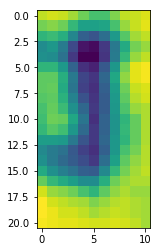

"\ni = 156\nx = get_box_data(i,f)['left'][0]\ny = get_box_data(i,f)['top'][0]\nw = get_box_data(i,f)['width'][0]\nh = get_box_data(i,f)['height'][0]\ncrop = X_train[i][y:y+h, x:x+w]\nimgplot = plt.imshow(crop)\nplt.show()\n"

In [289]:
#cropping images
crop_imgs = []
crop_imgs_label =[]
for i in tqdm.tqdm(range(int(len(files)/4))):
    for j in range(len(get_box_data(i,f)['height'])):
        x = get_box_data(i,f)['left'][j]
        y = get_box_data(i,f)['top'][j]
        w = get_box_data(i,f)['width'][j]
        h = get_box_data(i,f)['height'][j]

        crop = X_train[i][y:y+h, x:x+w]
        crop_imgs.append(crop) 
        crop_imgs_label.append(get_box_data(i,f)['label'][j])
       

plt.imshow(crop_imgs[11])
plt.show()
'''
i = 156
x = get_box_data(i,f)['left'][0]
y = get_box_data(i,f)['top'][0]
w = get_box_data(i,f)['width'][0]
h = get_box_data(i,f)['height'][0]
crop = X_train[i][y:y+h, x:x+w]
imgplot = plt.imshow(crop)
plt.show()
'''
#crop_img = img[y:y+h, x:x+w]
#cv2.imshow("cropped", crop_img)
#cv2.waitKey(0)

In [317]:
filenames = []
for i in tqdm.tqdm(range(int(len(files)/4))):
    for j in range(len(get_box_data(i,f)['height'])):
        filenames.append(i)
        




  0%|          | 0/8350 [00:00<?, ?it/s]


  0%|          | 15/8350 [00:00<00:55, 148.92it/s]


  0%|          | 22/8350 [00:00<01:15, 110.89it/s]


  0%|          | 29/8350 [00:00<01:30, 92.23it/s] 


  0%|          | 38/8350 [00:00<01:33, 88.91it/s]


  1%|          | 50/8350 [00:00<01:26, 95.78it/s]


  1%|          | 64/8350 [00:00<01:18, 105.35it/s]


  1%|          | 77/8350 [00:00<01:14, 111.21it/s]


  1%|          | 92/8350 [00:00<01:08, 120.07it/s]


  1%|▏         | 107/8350 [00:00<01:04, 126.82it/s]


  1%|▏         | 121/8350 [00:01<01:03, 129.89it/s]


  2%|▏         | 141/8350 [00:01<00:56, 144.93it/s]


  2%|▏         | 157/8350 [00:01<00:57, 143.26it/s]


  2%|▏         | 172/8350 [00:01<00:57, 142.84it/s]


  2%|▏         | 187/8350 [00:01<01:01, 133.45it/s]


  2%|▏         | 203/8350 [00:01<00:59, 138.00it/s]


  3%|▎         | 221/8350 [00:01<00:55, 146.67it/s]


  3%|▎         | 237/8350 [00:01<00:54, 147.64it/s]


  3%|▎         | 253/8350 [00:01<00:54, 149.56

 22%|██▏       | 1866/8350 [00:18<00:58, 111.04it/s]


 23%|██▎       | 1879/8350 [00:18<00:57, 113.18it/s]


 23%|██▎       | 1892/8350 [00:18<00:55, 115.95it/s]


 23%|██▎       | 1905/8350 [00:18<00:55, 116.39it/s]


 23%|██▎       | 1917/8350 [00:18<00:59, 108.04it/s]


 23%|██▎       | 1928/8350 [00:18<01:00, 105.59it/s]


 23%|██▎       | 1939/8350 [00:18<01:02, 102.77it/s]


 23%|██▎       | 1950/8350 [00:18<01:07, 95.14it/s] 


 23%|██▎       | 1961/8350 [00:18<01:05, 97.91it/s]


 24%|██▎       | 1975/8350 [00:19<01:00, 105.26it/s]


 24%|██▍       | 1987/8350 [00:19<00:58, 108.77it/s]


 24%|██▍       | 1999/8350 [00:19<00:58, 108.08it/s]


 24%|██▍       | 2016/8350 [00:19<00:52, 120.63it/s]


 24%|██▍       | 2030/8350 [00:19<00:50, 125.27it/s]


 24%|██▍       | 2045/8350 [00:19<00:48, 130.51it/s]


 25%|██▍       | 2059/8350 [00:19<00:47, 132.94it/s]


 25%|██▍       | 2074/8350 [00:19<00:45, 137.35it/s]


 25%|██▌       | 2088/8350 [00:19<00:45, 137.03it/s]


 25%|██▌   

 50%|████▉     | 4134/8350 [00:34<00:26, 157.32it/s]


 50%|████▉     | 4150/8350 [00:34<00:27, 155.03it/s]


 50%|████▉     | 4167/8350 [00:34<00:26, 158.91it/s]


 50%|█████     | 4186/8350 [00:34<00:25, 165.49it/s]


 50%|█████     | 4205/8350 [00:34<00:24, 169.50it/s]


 51%|█████     | 4224/8350 [00:34<00:23, 174.34it/s]


 51%|█████     | 4242/8350 [00:34<00:23, 172.12it/s]


 51%|█████     | 4261/8350 [00:35<00:23, 175.28it/s]


 51%|█████     | 4279/8350 [00:35<00:23, 174.75it/s]


 51%|█████▏    | 4297/8350 [00:35<00:23, 174.39it/s]


 52%|█████▏    | 4315/8350 [00:35<00:23, 168.77it/s]


 52%|█████▏    | 4332/8350 [00:35<00:24, 165.34it/s]


 52%|█████▏    | 4352/8350 [00:35<00:23, 172.26it/s]


 52%|█████▏    | 4370/8350 [00:35<00:23, 172.15it/s]


 53%|█████▎    | 4388/8350 [00:35<00:22, 173.06it/s]


 53%|█████▎    | 4406/8350 [00:35<00:23, 171.25it/s]


 53%|█████▎    | 4427/8350 [00:36<00:21, 179.51it/s]


 53%|█████▎    | 4446/8350 [00:36<00:22, 176.58it/s]


 53%|█████

 79%|███████▉  | 6592/8350 [00:50<00:16, 109.13it/s]


 79%|███████▉  | 6604/8350 [00:50<00:16, 103.30it/s]


 79%|███████▉  | 6619/8350 [00:50<00:15, 113.49it/s]


 79%|███████▉  | 6636/8350 [00:51<00:13, 125.58it/s]


 80%|███████▉  | 6652/8350 [00:51<00:12, 133.66it/s]


 80%|███████▉  | 6667/8350 [00:51<00:13, 123.92it/s]


 80%|████████  | 6680/8350 [00:51<00:13, 122.59it/s]


 80%|████████  | 6693/8350 [00:51<00:13, 124.10it/s]


 80%|████████  | 6710/8350 [00:51<00:12, 134.49it/s]


 81%|████████  | 6726/8350 [00:51<00:11, 139.87it/s]


 81%|████████  | 6741/8350 [00:51<00:11, 140.86it/s]


 81%|████████  | 6756/8350 [00:51<00:12, 132.58it/s]


 81%|████████  | 6771/8350 [00:52<00:11, 137.09it/s]


 81%|████████▏ | 6788/8350 [00:52<00:10, 142.72it/s]


 81%|████████▏ | 6803/8350 [00:52<00:10, 144.51it/s]


 82%|████████▏ | 6819/8350 [00:52<00:10, 146.91it/s]


 82%|████████▏ | 6834/8350 [00:52<00:11, 130.60it/s]


 82%|████████▏ | 6850/8350 [00:52<00:10, 136.90it/s]


 82%|█████

3099
2


C:\Users\HARSHIT\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:2961: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=-0.5, right=-0.5
  'left=%s, right=%s') % (left, right))


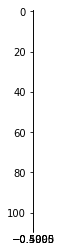

In [320]:
#Counter


print(filenames[6875])
print(crop_imgs_label[1571])
plt.imshow(crop_imgs[1571])
plt.show()

In [314]:
print(crop_imgs[1571].shape)


(108, 0)


33.93898323535815

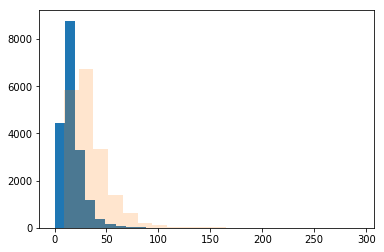

In [291]:
heights = []
width = []
for i in range(len(crop_imgs)):
    x= crop_imgs[i].shape[1]
    heights.append(x)
    z= crop_imgs[i].shape[0]
    width.append(z)
plt.hist(heights,bins=20)
plt.hist(width,bins=20, alpha = 0.2)
np.mean(width)

In [300]:
# Making the images into squares 

from PIL import Image
sqr_img = []
for i in range(len(crop_imgs)):
    
    im = crop_imgs[i]
    if im.shape[0] >= im.shape[1] :
        sqrWidth = im.shape[0]
    else :
        sqrWidth = im.shape[1]
    assert(sqrWidth>0)
    #assert(np.size(im)>0)
    if(np.size(im)==0):
        print(i,im.shape)
        continue
    im_resize = cv2.resize(im, (sqrWidth, sqrWidth),interpolation = cv2.INTER_CUBIC )
    sqr_img.append(im_resize)

543 (30, 0)
1571 (108, 0)
6875 (38, 0)
11710 (40, 0)
15150 (69, 0)


In [322]:
#Making all images to 36*36

sqr_img_small = []

for i in range(len(sqr_img)):
    
    im2 = sqr_img[i]
    
    im_resize2 = cv2.resize(im2, (36, 36),interpolation = cv2.INTER_CUBIC )
    sqr_img_small.append(im_resize2)

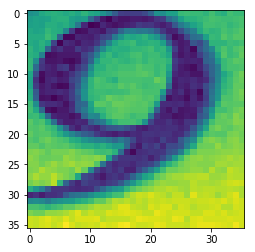

(36, 36)
9


In [323]:
#Verifying labels vs images (squared)
i=1

plt.imshow(sqr_img_small[i])
plt.show()
print(sqr_img_small[i].shape)
print(crop_imgs_label[i])

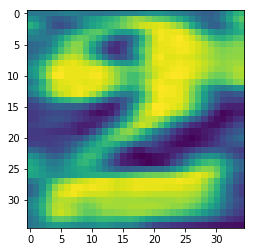

2


In [19]:
#Verifying labels vs images (squared)

i=86

plt.imshow(sqr_img[i])
plt.show()
im_resize.shape
print(crop_imgs_label[i])

In [178]:
print(sqr_img[6].shape)
print(np.asarray(sqr_img).shape)

(34, 34)
(220,)


In [351]:
#Resizing to 219*219

sqr_pad = []
for i in range(len(sqr_img)):
    width = int((219- (sqr_img[i].shape[1]))/2)
    if (2*width)+ sqr_img[i].shape[1] == 219 :
        
        image = cv2.copyMakeBorder( sqr_img[i], width , width , width , width , cv2.BORDER_)
     
    else :
        image = cv2.copyMakeBorder( sqr_img[i], width+1 , width , width+1 , width , cv2.BORDER_CONSTANT)  
    sqr_pad.append(image)

error: OpenCV(3.4.4) C:\projects\opencv-python\opencv\modules\core\src\copy.cpp:1186: error: (-215:Assertion failed) top >= 0 && bottom >= 0 && left >= 0 && right >= 0 && _src.dims() <= 2 in function 'cv::copyMakeBorder'


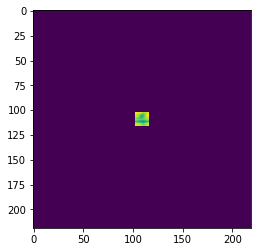

(219, 219)


4

In [202]:
i=15

plt.imshow(sqr_pad[i])
plt.show()
print(sqr_pad[i].shape)
crop_imgs_label[i]

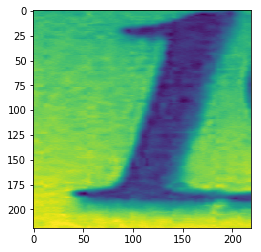

1


In [113]:
#Verifying labels vs images (squared)

i=0

plt.imshow(sqr_img_resize[i])
plt.show()
im_resize.shape
print(crop_imgs_label[i])

In [324]:
#Model Creation 


X_training = sqr_img_small
X_training = np.array(X_training)
print(type(X_training))
print(X_training[1])
#X_training /= 255


<class 'numpy.ndarray'>
[[ 65  67  74 ...  82  80  80]
 [ 70  72  71 ...  81  82  83]
 [ 71  72  71 ...  79  81  83]
 ...
 [ 91  89  89 ... 100 101 102]
 [101 100 102 ... 103 102 102]
 [101 100 102 ... 102 106 102]]


In [325]:
X_training = X_training.reshape(X_training.shape[0], 36, 36,1)

In [326]:
X_training.shape

(18367, 36, 36, 1)

In [328]:
crop_imgs_label.pop(543)
crop_imgs_label.pop(1571)
crop_imgs_label.pop(6875)
crop_imgs_label.pop(11710)
crop_imgs_label.pop(15150)

3

In [329]:
len(crop_imgs_label)

18367

In [ ]:
543 (30, 0)
1571 (108, 0)
6875 (38, 0)
11710 (40, 0)
15150

In [330]:

# Categorising into classes 

crop_imgs_lab = np_utils.to_categorical(np.asarray(crop_imgs_label)-1)

In [331]:
print(np.unique(crop_imgs_label))
print(crop_imgs_lab.shape)

[ 1  2  3  4  5  6  7  8  9 10]
(18367, 10)


In [332]:
# Training model


model = Sequential()
model.add(Convolution2D(filters = 6,kernel_size =(2,2),strides = (2,2),input_shape=(36, 36,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(filters = 6 ,kernel_size =(2,2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(filters = 12, kernel_size =(2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(36))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

In [343]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
# Fit the model
model.fit(X_training, crop_imgs_lab,validation_split=0.1, epochs=50, batch_size=200)

Train on 16530 samples, validate on 1837 samples
Epoch 1/50
16530/16530 [==============================] - ETA: 27:24 - loss: 1.4976 - acc: 0.49 - ETA: 8:56 - loss: 1.5222 - acc: 0.4750 - ETA: 6:38 - loss: 1.5177 - acc: 0.481 - ETA: 4:19 - loss: 1.4676 - acc: 0.493 - ETA: 3:10 - loss: 1.4708 - acc: 0.505 - ETA: 2:28 - loss: 1.4602 - acc: 0.510 - ETA: 2:00 - loss: 1.4614 - acc: 0.509 - ETA: 1:50 - loss: 1.4678 - acc: 0.505 - ETA: 1:33 - loss: 1.4518 - acc: 0.506 - ETA: 1:19 - loss: 1.4576 - acc: 0.504 - ETA: 1:09 - loss: 1.4476 - acc: 0.509 - ETA: 1:01 - loss: 1.4368 - acc: 0.512 - ETA: 54s - loss: 1.4377 - acc: 0.511 - ETA: 51s - loss: 1.4365 - acc: 0.51 - ETA: 45s - loss: 1.4449 - acc: 0.51 - ETA: 41s - loss: 1.4384 - acc: 0.51 - ETA: 37s - loss: 1.4249 - acc: 0.51 - ETA: 33s - loss: 1.4200 - acc: 0.51 - ETA: 30s - loss: 1.4153 - acc: 0.52 - ETA: 27s - loss: 1.4216 - acc: 0.52 - ETA: 25s - loss: 1.4199 - acc: 0.52 - ETA: 22s - loss: 1.4211 - acc: 0.52 - ETA: 20s - loss: 1.4207 - acc: 

16530/16530 [==============================] - ETA: 2s - loss: 1.5641 - acc: 0.500 - ETA: 2s - loss: 1.5431 - acc: 0.490 - ETA: 2s - loss: 1.4673 - acc: 0.512 - ETA: 2s - loss: 1.4886 - acc: 0.507 - ETA: 2s - loss: 1.4837 - acc: 0.507 - ETA: 2s - loss: 1.4523 - acc: 0.517 - ETA: 1s - loss: 1.4296 - acc: 0.523 - ETA: 1s - loss: 1.4301 - acc: 0.521 - ETA: 1s - loss: 1.4077 - acc: 0.532 - ETA: 1s - loss: 1.4046 - acc: 0.532 - ETA: 1s - loss: 1.4079 - acc: 0.531 - ETA: 1s - loss: 1.4094 - acc: 0.531 - ETA: 1s - loss: 1.4086 - acc: 0.531 - ETA: 1s - loss: 1.4070 - acc: 0.534 - ETA: 1s - loss: 1.4098 - acc: 0.531 - ETA: 1s - loss: 1.4111 - acc: 0.529 - ETA: 1s - loss: 1.4138 - acc: 0.527 - ETA: 1s - loss: 1.4125 - acc: 0.526 - ETA: 1s - loss: 1.4100 - acc: 0.525 - ETA: 1s - loss: 1.4064 - acc: 0.528 - ETA: 1s - loss: 1.4087 - acc: 0.526 - ETA: 1s - loss: 1.4043 - acc: 0.528 - ETA: 1s - loss: 1.3994 - acc: 0.530 - ETA: 1s - loss: 1.4009 - acc: 0.529 - ETA: 1s - loss: 1.3998 - acc: 0.529 - ETA

16530/16530 [==============================] - ETA: 1s - loss: 1.6692 - acc: 0.485 - ETA: 2s - loss: 1.4962 - acc: 0.505 - ETA: 2s - loss: 1.4602 - acc: 0.504 - ETA: 1s - loss: 1.4495 - acc: 0.511 - ETA: 1s - loss: 1.4255 - acc: 0.523 - ETA: 1s - loss: 1.4156 - acc: 0.524 - ETA: 2s - loss: 1.4192 - acc: 0.525 - ETA: 1s - loss: 1.4129 - acc: 0.526 - ETA: 1s - loss: 1.4081 - acc: 0.529 - ETA: 1s - loss: 1.4019 - acc: 0.533 - ETA: 1s - loss: 1.4065 - acc: 0.533 - ETA: 1s - loss: 1.4174 - acc: 0.530 - ETA: 1s - loss: 1.4119 - acc: 0.530 - ETA: 1s - loss: 1.4060 - acc: 0.532 - ETA: 1s - loss: 1.4019 - acc: 0.533 - ETA: 1s - loss: 1.4002 - acc: 0.534 - ETA: 1s - loss: 1.4001 - acc: 0.534 - ETA: 1s - loss: 1.4020 - acc: 0.534 - ETA: 1s - loss: 1.4034 - acc: 0.532 - ETA: 1s - loss: 1.4165 - acc: 0.527 - ETA: 0s - loss: 1.4156 - acc: 0.527 - ETA: 0s - loss: 1.4185 - acc: 0.525 - ETA: 0s - loss: 1.4161 - acc: 0.525 - ETA: 0s - loss: 1.4200 - acc: 0.525 - ETA: 0s - loss: 1.4124 - acc: 0.527 - ETA

16530/16530 [==============================] - ETA: 2s - loss: 1.2855 - acc: 0.580 - ETA: 1s - loss: 1.3337 - acc: 0.562 - ETA: 1s - loss: 1.3743 - acc: 0.533 - ETA: 1s - loss: 1.3802 - acc: 0.531 - ETA: 1s - loss: 1.3653 - acc: 0.542 - ETA: 1s - loss: 1.3618 - acc: 0.542 - ETA: 1s - loss: 1.3612 - acc: 0.542 - ETA: 1s - loss: 1.3828 - acc: 0.540 - ETA: 1s - loss: 1.3765 - acc: 0.542 - ETA: 1s - loss: 1.3792 - acc: 0.541 - ETA: 1s - loss: 1.3781 - acc: 0.540 - ETA: 1s - loss: 1.3775 - acc: 0.543 - ETA: 1s - loss: 1.3755 - acc: 0.544 - ETA: 1s - loss: 1.3802 - acc: 0.543 - ETA: 1s - loss: 1.3850 - acc: 0.541 - ETA: 1s - loss: 1.3932 - acc: 0.538 - ETA: 1s - loss: 1.4010 - acc: 0.535 - ETA: 1s - loss: 1.4033 - acc: 0.534 - ETA: 0s - loss: 1.4013 - acc: 0.533 - ETA: 0s - loss: 1.4058 - acc: 0.531 - ETA: 0s - loss: 1.4024 - acc: 0.533 - ETA: 0s - loss: 1.3992 - acc: 0.533 - ETA: 0s - loss: 1.3993 - acc: 0.533 - ETA: 0s - loss: 1.4023 - acc: 0.531 - ETA: 0s - loss: 1.4080 - acc: 0.529 - ETA

16530/16530 [==============================] - ETA: 1s - loss: 1.4589 - acc: 0.495 - ETA: 1s - loss: 1.4180 - acc: 0.530 - ETA: 1s - loss: 1.4228 - acc: 0.524 - ETA: 1s - loss: 1.4081 - acc: 0.533 - ETA: 1s - loss: 1.4046 - acc: 0.529 - ETA: 1s - loss: 1.3914 - acc: 0.530 - ETA: 1s - loss: 1.3849 - acc: 0.531 - ETA: 1s - loss: 1.3860 - acc: 0.533 - ETA: 1s - loss: 1.3792 - acc: 0.534 - ETA: 1s - loss: 1.3837 - acc: 0.534 - ETA: 1s - loss: 1.3860 - acc: 0.532 - ETA: 1s - loss: 1.3930 - acc: 0.530 - ETA: 1s - loss: 1.3956 - acc: 0.531 - ETA: 1s - loss: 1.3938 - acc: 0.530 - ETA: 1s - loss: 1.3969 - acc: 0.529 - ETA: 1s - loss: 1.3998 - acc: 0.528 - ETA: 1s - loss: 1.4025 - acc: 0.528 - ETA: 1s - loss: 1.4021 - acc: 0.528 - ETA: 0s - loss: 1.4028 - acc: 0.528 - ETA: 0s - loss: 1.4028 - acc: 0.527 - ETA: 0s - loss: 1.4040 - acc: 0.528 - ETA: 0s - loss: 1.4039 - acc: 0.529 - ETA: 0s - loss: 1.4066 - acc: 0.528 - ETA: 0s - loss: 1.4063 - acc: 0.528 - ETA: 0s - loss: 1.4007 - acc: 0.530 - ETA

16530/16530 [==============================] - ETA: 2s - loss: 1.3270 - acc: 0.580 - ETA: 2s - loss: 1.2911 - acc: 0.573 - ETA: 2s - loss: 1.2881 - acc: 0.564 - ETA: 2s - loss: 1.3214 - acc: 0.560 - ETA: 2s - loss: 1.3548 - acc: 0.545 - ETA: 1s - loss: 1.3761 - acc: 0.537 - ETA: 1s - loss: 1.3738 - acc: 0.540 - ETA: 1s - loss: 1.3818 - acc: 0.538 - ETA: 1s - loss: 1.3934 - acc: 0.535 - ETA: 1s - loss: 1.3902 - acc: 0.538 - ETA: 1s - loss: 1.3975 - acc: 0.538 - ETA: 1s - loss: 1.3974 - acc: 0.533 - ETA: 1s - loss: 1.3982 - acc: 0.533 - ETA: 1s - loss: 1.4062 - acc: 0.533 - ETA: 1s - loss: 1.4076 - acc: 0.534 - ETA: 1s - loss: 1.4026 - acc: 0.535 - ETA: 1s - loss: 1.4037 - acc: 0.534 - ETA: 1s - loss: 1.4046 - acc: 0.535 - ETA: 1s - loss: 1.4089 - acc: 0.534 - ETA: 1s - loss: 1.4124 - acc: 0.533 - ETA: 1s - loss: 1.4130 - acc: 0.531 - ETA: 1s - loss: 1.4132 - acc: 0.531 - ETA: 1s - loss: 1.4088 - acc: 0.532 - ETA: 1s - loss: 1.4091 - acc: 0.531 - ETA: 0s - loss: 1.4088 - acc: 0.530 - ETA

16530/16530 [==============================] - ETA: 2s - loss: 1.3252 - acc: 0.560 - ETA: 2s - loss: 1.3930 - acc: 0.546 - ETA: 2s - loss: 1.3856 - acc: 0.547 - ETA: 2s - loss: 1.3916 - acc: 0.545 - ETA: 2s - loss: 1.3929 - acc: 0.542 - ETA: 1s - loss: 1.3876 - acc: 0.541 - ETA: 1s - loss: 1.3859 - acc: 0.541 - ETA: 1s - loss: 1.3977 - acc: 0.538 - ETA: 1s - loss: 1.3960 - acc: 0.537 - ETA: 1s - loss: 1.4002 - acc: 0.539 - ETA: 1s - loss: 1.3916 - acc: 0.541 - ETA: 1s - loss: 1.4022 - acc: 0.538 - ETA: 1s - loss: 1.4006 - acc: 0.536 - ETA: 1s - loss: 1.3966 - acc: 0.535 - ETA: 1s - loss: 1.3912 - acc: 0.536 - ETA: 1s - loss: 1.3931 - acc: 0.538 - ETA: 1s - loss: 1.3959 - acc: 0.538 - ETA: 1s - loss: 1.3910 - acc: 0.538 - ETA: 1s - loss: 1.3873 - acc: 0.541 - ETA: 1s - loss: 1.3887 - acc: 0.541 - ETA: 1s - loss: 1.3863 - acc: 0.541 - ETA: 1s - loss: 1.3809 - acc: 0.543 - ETA: 0s - loss: 1.3843 - acc: 0.545 - ETA: 0s - loss: 1.3835 - acc: 0.545 - ETA: 0s - loss: 1.3840 - acc: 0.544 - ETA

16530/16530 [==============================] - ETA: 2s - loss: 1.2750 - acc: 0.550 - ETA: 2s - loss: 1.3169 - acc: 0.555 - ETA: 2s - loss: 1.3505 - acc: 0.555 - ETA: 2s - loss: 1.3395 - acc: 0.562 - ETA: 2s - loss: 1.3789 - acc: 0.548 - ETA: 2s - loss: 1.3806 - acc: 0.545 - ETA: 2s - loss: 1.3793 - acc: 0.545 - ETA: 2s - loss: 1.3828 - acc: 0.541 - ETA: 2s - loss: 1.3849 - acc: 0.538 - ETA: 2s - loss: 1.3909 - acc: 0.538 - ETA: 1s - loss: 1.3899 - acc: 0.542 - ETA: 1s - loss: 1.3790 - acc: 0.545 - ETA: 1s - loss: 1.3815 - acc: 0.541 - ETA: 1s - loss: 1.3823 - acc: 0.539 - ETA: 1s - loss: 1.3776 - acc: 0.540 - ETA: 1s - loss: 1.3820 - acc: 0.539 - ETA: 1s - loss: 1.3871 - acc: 0.536 - ETA: 1s - loss: 1.3800 - acc: 0.538 - ETA: 1s - loss: 1.3814 - acc: 0.537 - ETA: 1s - loss: 1.3836 - acc: 0.536 - ETA: 1s - loss: 1.3864 - acc: 0.536 - ETA: 1s - loss: 1.3907 - acc: 0.534 - ETA: 1s - loss: 1.3918 - acc: 0.535 - ETA: 0s - loss: 1.3898 - acc: 0.535 - ETA: 0s - loss: 1.3908 - acc: 0.536 - ETA

16530/16530 [==============================] - ETA: 1s - loss: 1.5698 - acc: 0.450 - ETA: 2s - loss: 1.4493 - acc: 0.508 - ETA: 2s - loss: 1.3943 - acc: 0.519 - ETA: 2s - loss: 1.3698 - acc: 0.521 - ETA: 2s - loss: 1.3405 - acc: 0.528 - ETA: 2s - loss: 1.3554 - acc: 0.533 - ETA: 2s - loss: 1.3679 - acc: 0.528 - ETA: 2s - loss: 1.3627 - acc: 0.536 - ETA: 1s - loss: 1.3579 - acc: 0.536 - ETA: 1s - loss: 1.3643 - acc: 0.537 - ETA: 1s - loss: 1.3633 - acc: 0.540 - ETA: 1s - loss: 1.3690 - acc: 0.539 - ETA: 1s - loss: 1.3684 - acc: 0.541 - ETA: 1s - loss: 1.3670 - acc: 0.541 - ETA: 1s - loss: 1.3665 - acc: 0.541 - ETA: 1s - loss: 1.3653 - acc: 0.542 - ETA: 1s - loss: 1.3597 - acc: 0.546 - ETA: 1s - loss: 1.3564 - acc: 0.547 - ETA: 1s - loss: 1.3656 - acc: 0.543 - ETA: 1s - loss: 1.3648 - acc: 0.543 - ETA: 1s - loss: 1.3664 - acc: 0.543 - ETA: 1s - loss: 1.3647 - acc: 0.544 - ETA: 1s - loss: 1.3635 - acc: 0.543 - ETA: 1s - loss: 1.3633 - acc: 0.543 - ETA: 0s - loss: 1.3655 - acc: 0.542 - ETA

Epoch 44/50
16530/16530 [==============================] - ETA: 2s - loss: 1.4207 - acc: 0.545 - ETA: 2s - loss: 1.3750 - acc: 0.556 - ETA: 2s - loss: 1.3792 - acc: 0.564 - ETA: 2s - loss: 1.4009 - acc: 0.559 - ETA: 2s - loss: 1.3771 - acc: 0.562 - ETA: 1s - loss: 1.3682 - acc: 0.565 - ETA: 1s - loss: 1.3741 - acc: 0.561 - ETA: 1s - loss: 1.3641 - acc: 0.562 - ETA: 1s - loss: 1.3668 - acc: 0.560 - ETA: 1s - loss: 1.3572 - acc: 0.563 - ETA: 1s - loss: 1.3562 - acc: 0.563 - ETA: 1s - loss: 1.3640 - acc: 0.560 - ETA: 1s - loss: 1.3690 - acc: 0.558 - ETA: 1s - loss: 1.3691 - acc: 0.556 - ETA: 1s - loss: 1.3655 - acc: 0.555 - ETA: 1s - loss: 1.3651 - acc: 0.557 - ETA: 1s - loss: 1.3605 - acc: 0.559 - ETA: 1s - loss: 1.3569 - acc: 0.560 - ETA: 1s - loss: 1.3559 - acc: 0.559 - ETA: 1s - loss: 1.3530 - acc: 0.561 - ETA: 1s - loss: 1.3556 - acc: 0.559 - ETA: 1s - loss: 1.3576 - acc: 0.560 - ETA: 0s - loss: 1.3573 - acc: 0.558 - ETA: 0s - loss: 1.3595 - acc: 0.557 - ETA: 0s - loss: 1.3557 - acc:

16530/16530 [==============================] - ETA: 2s - loss: 1.3438 - acc: 0.555 - ETA: 2s - loss: 1.3248 - acc: 0.570 - ETA: 2s - loss: 1.3298 - acc: 0.559 - ETA: 2s - loss: 1.3681 - acc: 0.546 - ETA: 1s - loss: 1.3414 - acc: 0.556 - ETA: 1s - loss: 1.3289 - acc: 0.558 - ETA: 1s - loss: 1.3262 - acc: 0.561 - ETA: 1s - loss: 1.3222 - acc: 0.559 - ETA: 1s - loss: 1.3221 - acc: 0.558 - ETA: 1s - loss: 1.3275 - acc: 0.555 - ETA: 1s - loss: 1.3220 - acc: 0.556 - ETA: 1s - loss: 1.3219 - acc: 0.558 - ETA: 1s - loss: 1.3166 - acc: 0.561 - ETA: 1s - loss: 1.3156 - acc: 0.561 - ETA: 1s - loss: 1.3158 - acc: 0.561 - ETA: 1s - loss: 1.3276 - acc: 0.558 - ETA: 1s - loss: 1.3255 - acc: 0.559 - ETA: 1s - loss: 1.3197 - acc: 0.561 - ETA: 1s - loss: 1.3243 - acc: 0.559 - ETA: 1s - loss: 1.3204 - acc: 0.560 - ETA: 0s - loss: 1.3232 - acc: 0.559 - ETA: 0s - loss: 1.3259 - acc: 0.560 - ETA: 0s - loss: 1.3271 - acc: 0.559 - ETA: 0s - loss: 1.3330 - acc: 0.557 - ETA: 0s - loss: 1.3349 - acc: 0.555 - ETA

In [347]:
pred = model.predict(X_training[:15])

# Class prediction
pred_class = model.predict_classes(X_training[:10])
print(pred_class[:10])

[0 8 8 4 0 4 9 4 2 0]


In [361]:
f2= h5py.File('E:/Text recog/test/digitStruct.mat','r')

In [349]:
# Importing TestDAtaset



PATH2 = r'E:/Text recog/test/*.png'
files2 = glob.glob(PATH2)
X_train2 = [ None for i in range(len(files2))]
print(len(files))
for fl2 in tqdm.tqdm(files2):
    flbase2 = os.path.basename(fl2)
    idx2 = int(flbase2[:-4])-1
    img2 = cv2.imread(fl2, 0)
    #X_train.append(img)
    #X_name.append(flbase)
    X_train2[idx2] = img2

33402





  0%|          | 0/13068 [00:00<?, ?it/s]


  0%|          | 4/13068 [00:00<21:07, 10.31it/s]


  0%|          | 6/13068 [00:00<18:43, 11.63it/s]


  0%|          | 9/13068 [00:00<16:10, 13.45it/s]


  0%|          | 13/13068 [00:00<12:57, 16.79it/s]


  0%|          | 19/13068 [00:00<10:12, 21.32it/s]


  0%|          | 25/13068 [00:00<08:15, 26.33it/s]


  0%|          | 35/13068 [00:01<06:26, 33.74it/s]


  0%|          | 45/13068 [00:01<05:11, 41.75it/s]


  0%|          | 53/13068 [00:01<04:31, 47.89it/s]


  0%|          | 60/13068 [00:01<04:15, 50.98it/s]


  1%|          | 71/13068 [00:01<03:35, 60.26it/s]


  1%|          | 81/13068 [00:01<03:14, 66.70it/s]


  1%|          | 93/13068 [00:01<02:49, 76.41it/s]


  1%|          | 103/13068 [00:01<02:41, 80.09it/s]


  1%|          | 113/13068 [00:01<02:55, 73.76it/s]


  1%|          | 123/13068 [00:02<02:44, 78.79it/s]


  1%|          | 132/13068 [00:02<02:42, 79.73it/s]


  1%|          | 143/13068 [00:02<02:29, 86.35it/s]

 12%|█▏        | 1556/13068 [00:17<01:56, 99.16it/s]


 12%|█▏        | 1567/13068 [00:17<01:55, 99.34it/s]


 12%|█▏        | 1578/13068 [00:17<01:55, 99.51it/s]


 12%|█▏        | 1589/13068 [00:17<01:56, 98.76it/s]


 12%|█▏        | 1599/13068 [00:17<02:01, 94.35it/s]


 12%|█▏        | 1613/13068 [00:17<01:51, 102.42it/s]


 12%|█▏        | 1625/13068 [00:17<01:47, 106.42it/s]


 13%|█▎        | 1637/13068 [00:18<01:45, 108.31it/s]


 13%|█▎        | 1648/13068 [00:18<01:51, 102.20it/s]


 13%|█▎        | 1660/13068 [00:18<01:47, 106.12it/s]


 13%|█▎        | 1674/13068 [00:18<01:39, 114.37it/s]


 13%|█▎        | 1687/13068 [00:18<01:38, 115.04it/s]


 13%|█▎        | 1700/13068 [00:18<01:36, 117.91it/s]


 13%|█▎        | 1712/13068 [00:18<01:36, 117.69it/s]


 13%|█▎        | 1724/13068 [00:18<01:43, 110.12it/s]


 13%|█▎        | 1736/13068 [00:18<01:45, 107.15it/s]


 13%|█▎        | 1750/13068 [00:19<01:39, 114.04it/s]


 13%|█▎        | 1762/13068 [00:19<01:40, 112.18it/s]

 25%|██▍       | 3264/13068 [00:34<01:34, 104.07it/s]


 25%|██▌       | 3275/13068 [00:34<01:43, 94.22it/s] 


 25%|██▌       | 3286/13068 [00:34<01:41, 95.90it/s]


 25%|██▌       | 3296/13068 [00:34<01:44, 93.78it/s]


 25%|██▌       | 3309/13068 [00:34<01:37, 100.44it/s]


 25%|██▌       | 3320/13068 [00:35<01:36, 100.52it/s]


 25%|██▌       | 3331/13068 [00:35<01:45, 92.71it/s] 


 26%|██▌       | 3343/13068 [00:35<01:38, 99.08it/s]


 26%|██▌       | 3354/13068 [00:35<01:38, 98.70it/s]


 26%|██▌       | 3365/13068 [00:35<01:37, 99.56it/s]


 26%|██▌       | 3376/13068 [00:35<01:42, 94.48it/s]


 26%|██▌       | 3388/13068 [00:35<01:38, 98.10it/s]


 26%|██▌       | 3400/13068 [00:35<01:33, 103.36it/s]


 26%|██▌       | 3411/13068 [00:35<01:35, 100.70it/s]


 26%|██▌       | 3422/13068 [00:36<01:36, 99.76it/s] 


 26%|██▋       | 3435/13068 [00:36<01:32, 104.51it/s]


 26%|██▋       | 3447/13068 [00:36<01:30, 106.43it/s]


 26%|██▋       | 3458/13068 [00:36<01:34, 101.86it/s]



 38%|███▊      | 4942/13068 [00:51<01:33, 87.19it/s]


 38%|███▊      | 4952/13068 [00:51<01:38, 82.14it/s]


 38%|███▊      | 4964/13068 [00:51<01:30, 89.58it/s]


 38%|███▊      | 4975/13068 [00:51<01:26, 94.05it/s]


 38%|███▊      | 4986/13068 [00:51<01:24, 96.11it/s]


 38%|███▊      | 4996/13068 [00:51<01:23, 96.53it/s]


 38%|███▊      | 5006/13068 [00:51<01:33, 85.92it/s]


 38%|███▊      | 5019/13068 [00:52<01:24, 94.82it/s]


 38%|███▊      | 5030/13068 [00:52<01:27, 92.33it/s]


 39%|███▊      | 5041/13068 [00:52<01:24, 95.32it/s]


 39%|███▊      | 5051/13068 [00:52<01:58, 67.82it/s]


 39%|███▊      | 5062/13068 [00:52<01:45, 76.16it/s]


 39%|███▉      | 5074/13068 [00:52<01:35, 83.82it/s]


 39%|███▉      | 5084/13068 [00:52<01:34, 84.68it/s]


 39%|███▉      | 5094/13068 [00:52<01:32, 86.45it/s]


 39%|███▉      | 5107/13068 [00:53<01:24, 94.77it/s]


 39%|███▉      | 5118/13068 [00:53<01:22, 96.66it/s]


 39%|███▉      | 5129/13068 [00:53<01:20, 99.12it/s]


 39%|███▉ 

 50%|█████     | 6590/13068 [01:08<01:08, 95.00it/s]


 51%|█████     | 6601/13068 [01:08<01:06, 97.60it/s]


 51%|█████     | 6613/13068 [01:08<01:03, 102.40it/s]


 51%|█████     | 6624/13068 [01:08<01:03, 101.18it/s]


 51%|█████     | 6637/13068 [01:08<01:00, 105.66it/s]


 51%|█████     | 6648/13068 [01:09<01:03, 101.08it/s]


 51%|█████     | 6660/13068 [01:09<01:01, 104.08it/s]


 51%|█████     | 6671/13068 [01:09<01:02, 102.19it/s]


 51%|█████     | 6682/13068 [01:09<01:09, 91.41it/s] 


 51%|█████     | 6692/13068 [01:09<01:08, 92.89it/s]


 51%|█████▏    | 6703/13068 [01:09<01:05, 96.57it/s]


 51%|█████▏    | 6715/13068 [01:09<01:02, 102.10it/s]


 51%|█████▏    | 6726/13068 [01:09<01:04, 98.44it/s] 


 52%|█████▏    | 6738/13068 [01:10<01:11, 88.10it/s]


 52%|█████▏    | 6748/13068 [01:10<01:55, 54.84it/s]


 52%|█████▏    | 6758/13068 [01:10<01:40, 62.94it/s]


 52%|█████▏    | 6771/13068 [01:10<01:26, 72.90it/s]


 52%|█████▏    | 6783/13068 [01:10<01:16, 81.99it/s]


 

 63%|██████▎   | 8217/13068 [01:25<00:51, 93.46it/s]


 63%|██████▎   | 8227/13068 [01:25<00:54, 89.17it/s]


 63%|██████▎   | 8238/13068 [01:25<00:51, 94.44it/s]


 63%|██████▎   | 8248/13068 [01:26<01:04, 75.19it/s]


 63%|██████▎   | 8259/13068 [01:26<00:59, 80.84it/s]


 63%|██████▎   | 8268/13068 [01:26<00:58, 82.54it/s]


 63%|██████▎   | 8281/13068 [01:26<00:51, 92.27it/s]


 63%|██████▎   | 8291/13068 [01:26<00:51, 92.55it/s]


 64%|██████▎   | 8303/13068 [01:26<00:49, 96.40it/s]


 64%|██████▎   | 8314/13068 [01:26<00:52, 90.25it/s]


 64%|██████▎   | 8324/13068 [01:26<00:54, 87.81it/s]


 64%|██████▍   | 8334/13068 [01:27<00:54, 87.00it/s]


 64%|██████▍   | 8344/13068 [01:27<00:52, 90.20it/s]


 64%|██████▍   | 8354/13068 [01:27<01:00, 77.89it/s]


 64%|██████▍   | 8363/13068 [01:27<01:02, 75.86it/s]


 64%|██████▍   | 8375/13068 [01:27<00:56, 82.94it/s]


 64%|██████▍   | 8384/13068 [01:27<00:56, 83.29it/s]


 64%|██████▍   | 8394/13068 [01:27<00:54, 86.35it/s]


 64%|█████

 75%|███████▌  | 9806/13068 [01:43<00:38, 84.14it/s]


 75%|███████▌  | 9817/13068 [01:43<00:36, 90.05it/s]


 75%|███████▌  | 9830/13068 [01:43<00:33, 96.22it/s]


 75%|███████▌  | 9841/13068 [01:43<00:32, 98.36it/s]


 75%|███████▌  | 9852/13068 [01:43<00:33, 96.67it/s]


 75%|███████▌  | 9863/13068 [01:44<00:32, 98.35it/s]


 76%|███████▌  | 9874/13068 [01:44<00:34, 93.02it/s]


 76%|███████▌  | 9884/13068 [01:44<00:33, 94.54it/s]


 76%|███████▌  | 9894/13068 [01:44<00:36, 87.36it/s]


 76%|███████▌  | 9903/13068 [01:44<00:37, 84.53it/s]


 76%|███████▌  | 9914/13068 [01:44<00:36, 85.87it/s]


 76%|███████▌  | 9925/13068 [01:44<00:34, 90.26it/s]


 76%|███████▌  | 9936/13068 [01:44<00:32, 95.21it/s]


 76%|███████▌  | 9946/13068 [01:44<00:34, 90.69it/s]


 76%|███████▌  | 9957/13068 [01:45<00:33, 93.80it/s]


 76%|███████▋  | 9967/13068 [01:45<00:55, 55.66it/s]


 76%|███████▋  | 9975/13068 [01:45<00:50, 61.11it/s]


 76%|███████▋  | 9985/13068 [01:45<00:45, 67.85it/s]


 76%|█████

 87%|████████▋ | 11346/13068 [02:01<00:43, 39.85it/s]


 87%|████████▋ | 11351/13068 [02:01<00:41, 41.62it/s]


 87%|████████▋ | 11356/13068 [02:02<00:39, 43.63it/s]


 87%|████████▋ | 11361/13068 [02:02<00:42, 40.50it/s]


 87%|████████▋ | 11366/13068 [02:02<00:43, 38.98it/s]


 87%|████████▋ | 11371/13068 [02:02<00:44, 38.03it/s]


 87%|████████▋ | 11376/13068 [02:02<00:46, 36.76it/s]


 87%|████████▋ | 11380/13068 [02:02<00:53, 31.77it/s]


 87%|████████▋ | 11384/13068 [02:02<00:56, 29.72it/s]


 87%|████████▋ | 11388/13068 [02:03<00:54, 30.79it/s]


 87%|████████▋ | 11392/13068 [02:03<00:54, 30.72it/s]


 87%|████████▋ | 11396/13068 [02:03<00:53, 31.16it/s]


 87%|████████▋ | 11401/13068 [02:03<00:49, 33.41it/s]


 87%|████████▋ | 11405/13068 [02:03<00:49, 33.58it/s]


 87%|████████▋ | 11409/13068 [02:03<00:49, 33.59it/s]


 87%|████████▋ | 11413/13068 [02:03<00:48, 34.15it/s]


 87%|████████▋ | 11417/13068 [02:03<00:52, 31.39it/s]


 87%|████████▋ | 11422/13068 [02:04<00:49, 33.22

 98%|█████████▊| 12795/13068 [02:18<00:02, 99.77it/s] 


 98%|█████████▊| 12808/13068 [02:18<00:02, 105.82it/s]


 98%|█████████▊| 12819/13068 [02:18<00:02, 102.73it/s]


 98%|█████████▊| 12830/13068 [02:19<00:02, 91.08it/s] 


 98%|█████████▊| 12840/13068 [02:19<00:02, 91.85it/s]


 98%|█████████▊| 12852/13068 [02:19<00:02, 98.64it/s]


 98%|█████████▊| 12863/13068 [02:19<00:02, 97.69it/s]


 99%|█████████▊| 12873/13068 [02:19<00:02, 91.73it/s]


 99%|█████████▊| 12884/13068 [02:19<00:01, 93.98it/s]


 99%|█████████▊| 12894/13068 [02:19<00:01, 95.16it/s]


 99%|█████████▉| 12905/13068 [02:19<00:01, 98.70it/s]


 99%|█████████▉| 12915/13068 [02:19<00:01, 94.66it/s]


 99%|█████████▉| 12926/13068 [02:20<00:01, 98.55it/s]


 99%|█████████▉| 12936/13068 [02:20<00:01, 98.58it/s]


 99%|█████████▉| 12947/13068 [02:20<00:01, 101.70it/s]


 99%|█████████▉| 12961/13068 [02:20<00:00, 108.57it/s]


 99%|█████████▉| 12973/13068 [02:20<00:00, 102.48it/s]


 99%|█████████▉| 12986/13068 [02:20<00:00

In [362]:
# Function to import box data for test

def get_box_data_test(index, f2):
    """
    get `left, top, width, height` of each picture
    :param index:
    :param hdf5_data:
    :return:
    """
    meta_data = dict()
    meta_data['height'] = []
    meta_data['label'] = []
    meta_data['left'] = []
    meta_data['top'] = []
    meta_data['width'] = []

    def print_attrs_test(name, obj):
        vals = []
        if obj.shape[0] == 1:
            vals.append(int(obj[0][0]))
        else:
            for k in range(obj.shape[0]):
                vals.append(int(f2[obj[k][0]][0][0]))
        meta_data[name] = vals

    box = f2['/digitStruct/bbox'][index]
    f2[box[0]].visititems(print_attrs_test)
    return meta_data

#def get_name_test(index, f2):
 #   name = f2['/digitStruct/name']
  #  return ''.join([chr(v[0]) for v in f2[name[index][0]].value])

In [411]:
get_box_data_test(2,f2)

{'height': [16], 'label': [6], 'left': [61], 'top': [6], 'width': [11]}

In [366]:
#cropping images for test
crop_imgs_test = []

for i in tqdm.tqdm(range(int(len(files2)/4))):
    for j in range(len(get_box_data_test(i,f2)['height'])):
        x = get_box_data_test(i,f2)['left'][j]
        y = get_box_data_test(i,f2)['top'][j]
        w = get_box_data_test(i,f2)['width'][j]
        h = get_box_data_test(i,f2)['height'][j]

        crop_test = X_train2[i][y:y+h, x:x+w]
        crop_imgs_test.append(crop_test) 
        #crop_imgs_label.append(get_box_data(i,f)['label'][j])
       








  0%|          | 0/3267 [00:00<?, ?it/s]




  0%|          | 2/3267 [00:00<03:54, 13.93it/s]




  0%|          | 7/3267 [00:00<03:18, 16.38it/s]




  0%|          | 9/3267 [00:00<03:41, 14.74it/s]




  0%|          | 11/3267 [00:00<03:28, 15.64it/s]




  0%|          | 13/3267 [00:00<03:23, 15.98it/s]




  0%|          | 16/3267 [00:00<03:00, 18.00it/s]




  1%|          | 18/3267 [00:00<03:00, 17.97it/s]




  1%|          | 20/3267 [00:01<03:21, 16.13it/s]




  1%|          | 22/3267 [00:01<03:42, 14.59it/s]




  1%|          | 26/3267 [00:01<03:09, 17.11it/s]




  1%|          | 28/3267 [00:01<03:05, 17.48it/s]




  1%|          | 30/3267 [00:01<03:02, 17.74it/s]




  1%|          | 33/3267 [00:01<02:47, 19.34it/s]




  1%|          | 36/3267 [00:01<02:42, 19.86it/s]




  1%|          | 39/3267 [00:02<02:34, 20.95it/s]




  1%|▏         | 42/3267 [00:02<02:40, 20.10it/s]




  1%|▏         | 45/3267 [00:02<03:06, 17.28it/s]




  1%|▏         | 47/3267 [00:02<03:

 13%|█▎        | 429/3267 [00:21<02:15, 21.01it/s]




 13%|█▎        | 432/3267 [00:21<02:05, 22.58it/s]




 13%|█▎        | 435/3267 [00:21<02:20, 20.18it/s]




 13%|█▎        | 439/3267 [00:21<02:02, 23.06it/s]




 14%|█▎        | 442/3267 [00:21<01:57, 23.97it/s]




 14%|█▎        | 445/3267 [00:21<01:53, 24.77it/s]




 14%|█▎        | 448/3267 [00:21<02:08, 22.02it/s]




 14%|█▍        | 451/3267 [00:22<02:17, 20.43it/s]




 14%|█▍        | 454/3267 [00:22<02:06, 22.25it/s]




 14%|█▍        | 457/3267 [00:22<02:06, 22.17it/s]




 14%|█▍        | 460/3267 [00:22<02:15, 20.73it/s]




 14%|█▍        | 463/3267 [00:22<02:34, 18.11it/s]




 14%|█▍        | 466/3267 [00:22<02:26, 19.12it/s]




 14%|█▍        | 469/3267 [00:23<02:35, 18.00it/s]




 14%|█▍        | 471/3267 [00:23<03:13, 14.44it/s]




 14%|█▍        | 473/3267 [00:23<03:26, 13.56it/s]




 15%|█▍        | 475/3267 [00:23<03:41, 12.58it/s]




 15%|█▍        | 477/3267 [00:23<03:57, 11.75it/s]




 15%|█▍   

 27%|██▋       | 870/3267 [00:42<01:35, 25.18it/s]




 27%|██▋       | 873/3267 [00:42<01:40, 23.77it/s]




 27%|██▋       | 876/3267 [00:42<01:42, 23.30it/s]




 27%|██▋       | 879/3267 [00:42<01:43, 22.99it/s]




 27%|██▋       | 882/3267 [00:42<02:03, 19.34it/s]




 27%|██▋       | 885/3267 [00:43<02:02, 19.48it/s]




 27%|██▋       | 888/3267 [00:43<02:12, 17.96it/s]




 27%|██▋       | 892/3267 [00:43<01:53, 20.98it/s]




 27%|██▋       | 895/3267 [00:43<01:52, 21.09it/s]




 27%|██▋       | 898/3267 [00:43<02:13, 17.78it/s]




 28%|██▊       | 901/3267 [00:43<02:05, 18.89it/s]




 28%|██▊       | 904/3267 [00:44<02:07, 18.51it/s]




 28%|██▊       | 906/3267 [00:44<02:17, 17.19it/s]




 28%|██▊       | 908/3267 [00:44<02:15, 17.36it/s]




 28%|██▊       | 910/3267 [00:44<02:20, 16.81it/s]




 28%|██▊       | 912/3267 [00:44<02:26, 16.10it/s]




 28%|██▊       | 915/3267 [00:44<02:17, 17.14it/s]




 28%|██▊       | 917/3267 [00:44<02:12, 17.78it/s]




 28%|██▊  

 39%|███▉      | 1280/3267 [01:02<01:30, 21.98it/s]




 39%|███▉      | 1283/3267 [01:03<01:30, 21.93it/s]




 39%|███▉      | 1286/3267 [01:03<01:44, 18.88it/s]




 39%|███▉      | 1289/3267 [01:03<01:53, 17.44it/s]




 40%|███▉      | 1291/3267 [01:03<01:52, 17.58it/s]




 40%|███▉      | 1293/3267 [01:03<01:57, 16.83it/s]




 40%|███▉      | 1295/3267 [01:03<01:57, 16.80it/s]




 40%|███▉      | 1298/3267 [01:04<01:43, 19.10it/s]




 40%|███▉      | 1301/3267 [01:04<01:44, 18.73it/s]




 40%|███▉      | 1304/3267 [01:04<01:34, 20.85it/s]




 40%|████      | 1307/3267 [01:04<01:50, 17.76it/s]




 40%|████      | 1311/3267 [01:04<01:40, 19.49it/s]




 40%|████      | 1314/3267 [01:04<01:36, 20.17it/s]




 40%|████      | 1317/3267 [01:04<01:41, 19.17it/s]




 40%|████      | 1320/3267 [01:05<01:33, 20.93it/s]




 40%|████      | 1323/3267 [01:05<01:47, 18.15it/s]




 41%|████      | 1326/3267 [01:05<01:36, 20.19it/s]




 41%|████      | 1329/3267 [01:05<01:33, 20.82it

 52%|█████▏    | 1710/3267 [01:24<01:40, 15.55it/s]




 52%|█████▏    | 1715/3267 [01:24<01:22, 18.90it/s]




 53%|█████▎    | 1718/3267 [01:24<01:21, 19.05it/s]




 53%|█████▎    | 1721/3267 [01:24<01:31, 16.92it/s]




 53%|█████▎    | 1723/3267 [01:24<01:27, 17.57it/s]




 53%|█████▎    | 1726/3267 [01:24<01:17, 19.76it/s]




 53%|█████▎    | 1729/3267 [01:25<01:15, 20.32it/s]




 53%|█████▎    | 1732/3267 [01:25<01:14, 20.69it/s]




 53%|█████▎    | 1735/3267 [01:25<01:12, 21.13it/s]




 53%|█████▎    | 1738/3267 [01:25<01:16, 19.97it/s]




 53%|█████▎    | 1742/3267 [01:25<01:07, 22.71it/s]




 53%|█████▎    | 1745/3267 [01:25<01:14, 20.29it/s]




 54%|█████▎    | 1748/3267 [01:25<01:19, 19.10it/s]




 54%|█████▎    | 1752/3267 [01:26<01:13, 20.70it/s]




 54%|█████▎    | 1755/3267 [01:26<01:10, 21.33it/s]




 54%|█████▍    | 1758/3267 [01:26<01:05, 23.05it/s]




 54%|█████▍    | 1761/3267 [01:26<01:11, 21.00it/s]




 54%|█████▍    | 1764/3267 [01:26<01:13, 20.54it

 65%|██████▌   | 2132/3267 [01:44<01:08, 16.61it/s]




 65%|██████▌   | 2135/3267 [01:44<00:59, 18.93it/s]




 65%|██████▌   | 2138/3267 [01:45<00:59, 19.00it/s]




 66%|██████▌   | 2141/3267 [01:45<01:03, 17.61it/s]




 66%|██████▌   | 2144/3267 [01:45<01:00, 18.62it/s]




 66%|██████▌   | 2147/3267 [01:45<00:53, 20.85it/s]




 66%|██████▌   | 2150/3267 [01:45<00:57, 19.41it/s]




 66%|██████▌   | 2153/3267 [01:45<00:56, 19.75it/s]




 66%|██████▌   | 2156/3267 [01:46<00:50, 21.87it/s]




 66%|██████▌   | 2159/3267 [01:46<00:50, 21.80it/s]




 66%|██████▌   | 2162/3267 [01:46<00:54, 20.26it/s]




 66%|██████▋   | 2165/3267 [01:46<00:57, 19.27it/s]




 66%|██████▋   | 2167/3267 [01:46<01:02, 17.74it/s]




 66%|██████▋   | 2169/3267 [01:46<01:01, 17.88it/s]




 66%|██████▋   | 2172/3267 [01:46<00:57, 19.01it/s]




 67%|██████▋   | 2175/3267 [01:46<00:51, 21.05it/s]




 67%|██████▋   | 2178/3267 [01:47<00:51, 20.96it/s]




 67%|██████▋   | 2181/3267 [01:47<00:47, 22.68it

 78%|███████▊  | 2556/3267 [02:05<00:43, 16.48it/s]




 78%|███████▊  | 2558/3267 [02:06<00:59, 11.92it/s]




 78%|███████▊  | 2561/3267 [02:06<00:54, 12.89it/s]




 78%|███████▊  | 2563/3267 [02:06<00:51, 13.64it/s]




 79%|███████▊  | 2565/3267 [02:06<00:49, 14.31it/s]




 79%|███████▊  | 2568/3267 [02:06<00:44, 15.71it/s]




 79%|███████▊  | 2570/3267 [02:06<00:42, 16.31it/s]




 79%|███████▉  | 2573/3267 [02:06<00:37, 18.55it/s]




 79%|███████▉  | 2576/3267 [02:07<00:35, 19.50it/s]




 79%|███████▉  | 2579/3267 [02:07<00:36, 18.85it/s]




 79%|███████▉  | 2581/3267 [02:07<00:38, 17.95it/s]




 79%|███████▉  | 2583/3267 [02:07<00:38, 17.70it/s]




 79%|███████▉  | 2585/3267 [02:07<00:43, 15.79it/s]




 79%|███████▉  | 2587/3267 [02:07<00:45, 14.94it/s]




 79%|███████▉  | 2589/3267 [02:07<00:45, 14.75it/s]




 79%|███████▉  | 2591/3267 [02:08<00:45, 14.85it/s]




 79%|███████▉  | 2594/3267 [02:08<00:43, 15.60it/s]




 79%|███████▉  | 2596/3267 [02:08<00:40, 16.55it

 91%|█████████ | 2981/3267 [02:26<00:16, 17.68it/s]




 91%|█████████▏| 2983/3267 [02:27<00:15, 18.03it/s]




 91%|█████████▏| 2985/3267 [02:27<00:15, 18.49it/s]




 91%|█████████▏| 2989/3267 [02:27<00:12, 21.56it/s]




 92%|█████████▏| 2992/3267 [02:27<00:12, 21.68it/s]




 92%|█████████▏| 2995/3267 [02:27<00:12, 21.53it/s]




 92%|█████████▏| 2998/3267 [02:27<00:11, 23.05it/s]




 92%|█████████▏| 3001/3267 [02:27<00:15, 17.24it/s]




 92%|█████████▏| 3004/3267 [02:28<00:15, 17.25it/s]




 92%|█████████▏| 3006/3267 [02:28<00:14, 17.87it/s]




 92%|█████████▏| 3008/3267 [02:28<00:14, 18.17it/s]




 92%|█████████▏| 3011/3267 [02:28<00:13, 19.26it/s]




 92%|█████████▏| 3014/3267 [02:28<00:12, 19.99it/s]




 92%|█████████▏| 3017/3267 [02:28<00:13, 18.56it/s]




 93%|█████████▎| 3022/3267 [02:28<00:11, 22.22it/s]




 93%|█████████▎| 3025/3267 [02:29<00:10, 22.19it/s]




 93%|█████████▎| 3028/3267 [02:29<00:10, 22.17it/s]




 93%|█████████▎| 3031/3267 [02:29<00:09, 23.73it

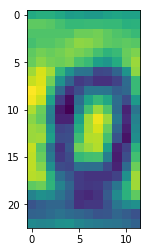

In [372]:
plt.imshow(crop_imgs_test[3])
plt.show()

In [412]:
# Making the test images into squares 


sqr_img_test = []
for i in range(len(crop_imgs_test)):
    
    im_test = crop_imgs_test[i]
    if im_test.shape[0] >= im_test.shape[1] :
        sqrWidth2 = im_test.shape[0]
    else :
        sqrWidth2 = im_test.shape[1]
    assert(sqrWidth2>0)
    #assert(np.size(im)>0)
    if(np.size(im_test)==0):
        print(i,im_test.shape)
        continue
    im_test_resize = cv2.resize(im_test, (sqrWidth2, sqrWidth2),interpolation = cv2.INTER_CUBIC )
    sqr_img_test.append(im_test_resize)

662 (18, 0)
842 (60, 0)
1017 (52, 0)
5186 (71, 0)


In [413]:
#Making all images to 36*36

sqr_img_small_test = []

for i in range(len(sqr_img_test)):
    
    im3 = sqr_img_test[i]
    
    im_resize3 = cv2.resize(im3, (36, 36),interpolation = cv2.INTER_CUBIC )
    sqr_img_small_test.append(im_resize3)

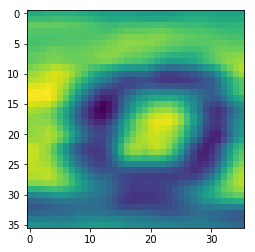

(36, 36)


In [414]:
plt.imshow(sqr_img_small_test[3])
plt.show()
print(sqr_img_small_test[3].shape)

In [415]:
sqr_img_small_test = np.asarray(sqr_img_small_test)

In [416]:
sqr_img_small_test[0].shape

(36, 36)

In [417]:
sqr_img_small_test = sqr_img_small_test.reshape(sqr_img_small_test.shape[0], 36, 36,1)

In [418]:
pred = model.predict(sqr_img_small_test[:20])

# Class prediction
pred_class = model.predict_classes(sqr_img_small_test[:20])
print(pred_class[:20])

[4 2 0 5 5 0 7 0 0 7 4 5 4 0 0 0 0 5 0 3]
